# Import libraries

In [250]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import category_encoders as ce
from sklearn.preprocessing import OrdinalEncoder
warnings.filterwarnings('ignore')

# Import Data

In [251]:
data_orig = pd.read_csv("Training_Data.csv")

In [252]:
data_orig

Id   Income  Age  Experience Married/Single House_Ownership  \
0            1  1303834   23           3         single          rented   
1            2  7574516   40          10         single          rented   
2            3  3991815   66           4        married          rented   
3            4  6256451   41           2         single          rented   
4            5  5768871   47          11         single          rented   
...        ...      ...  ...         ...            ...             ...   
251995  251996  8154883   43          13         single          rented   
251996  251997  2843572   26          10         single          rented   
251997  251998  4522448   46           7         single          rented   
251998  251999  6507128   45           0         single          rented   
251999  252000  9070230   70          17         single          rented   

       Car_Ownership           Profession                 CITY  \
0                 no  Mechanical_engineer                 Rewa   
1                 no   Software_Developer             Parbhani   
2                 no     Technical_writer            Alappuzha   
3                yes   Software_Developer          Bhubaneswar   
4                 no        Civil_servant  Tiruchirappalli[10]   
...              ...                  ...                  ...   
251995            no              Surgeon              Kolkata   
251996            no         Army_officer                 Rewa   
251997            no      Design_Engineer      Kalyan-Dombivli   
251998            no     Graphic_Designer          Pondicherry   
251999            no         Statistician                Avadi   

                 STATE  CURRENT_JOB_YRS  CURRENT_HOUSE_YRS  Risk_Flag  
0       Madhya_Pradesh                3                 13          0  
1          Maharashtra                9                 13          0  
2               Kerala                4                 10          0  
3               Odisha                2                 12          1  
4           Tamil_Nadu                3                 14          1  
...                ...              ...                ...        ...  
251995     West_Bengal                6                 11          0  
251996  Madhya_Pradesh                6                 11          0  
251997     Maharashtra                7                 12          0  
251998      Puducherry                0                 10          0  
251999      Tamil_Nadu                7                 11          0  

[252000 rows x 13 columns]

In [255]:
# for reducing faults in typing column names
data_orig.columns = data_orig.columns.str.lower()
data_orig.columns

Index(['id', 'income', 'age', 'experience', 'married/single',
       'house_ownership', 'car_ownership', 'profession', 'city', 'state',
       'current_job_yrs', 'current_house_yrs', 'risk_flag'],
      dtype='object')

# preprocessing

In [256]:
data_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   id                 252000 non-null  int64 
 1   income             252000 non-null  int64 
 2   age                252000 non-null  int64 
 3   experience         252000 non-null  int64 
 4   married/single     252000 non-null  object
 5   house_ownership    252000 non-null  object
 6   car_ownership      252000 non-null  object
 7   profession         252000 non-null  object
 8   city               252000 non-null  object
 9   state              252000 non-null  object
 10  current_job_yrs    252000 non-null  int64 
 11  current_house_yrs  252000 non-null  int64 
 12  risk_flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [257]:
# remove the id column as it not required for final modeling(unique)
data_orig.drop(["id"], axis = 1,inplace = True)

## Handle missing values

In [259]:
# checking for null values

data_orig.isna().sum()

income               0
age                  0
experience           0
married/single       0
house_ownership      0
car_ownership        0
profession           0
city                 0
state                0
current_job_yrs      0
current_house_yrs    0
risk_flag            0
dtype: int64

# Handle duplicate data

In [260]:
data_orig.duplicated().sum()

208810

In [261]:
data_orig.drop_duplicates(inplace = True)

In [262]:
data_orig.shape

(43190, 12)

# Handle categorical data

#### Lets look into  city feature values**

In [271]:
data_orig["city"].unique()

array(['Rewa', 'Parbhani', 'Alappuzha', 'Bhubaneswar', 'Tiruchirappalli',
       'Jalgaon', 'Tiruppur', 'Jamnagar', 'Kota', 'Karimnagar', 'Hajipur',
       'Adoni', 'Erode', 'Kollam', 'Madurai', 'Anantapuram', 'Kamarhati',
       'Bhusawal', 'Sirsa', 'Amaravati', 'Secunderabad', 'Ahmedabad',
       'Ajmer', 'Ongole', 'Miryalaguda', 'Ambattur', 'Indore',
       'Pondicherry', 'Shimoga', 'Chennai', 'Gulbarga', 'Khammam',
       'Saharanpur', 'Gopalpur', 'Amravati', 'Udupi', 'Howrah',
       'Aurangabad', 'Hospet', 'Shimla', 'Khandwa', 'Bidhannagar',
       'Bellary', 'Danapur', 'Purnia', 'Bijapur', 'Patiala', 'Malda',
       'Sagar', 'Durgapur', 'Junagadh', 'Singrauli', 'Agartala',
       'Thanjavur', 'Hindupur', 'Naihati', 'North', 'Panchkula',
       'Anantapur', 'Serampore', 'Bathinda', 'Nadiad', 'Kanpur',
       'Haridwar', 'Berhampur', 'Jamshedpur', 'Hyderabad', 'Bidar',
       'Kottayam', 'Solapur', 'Suryapet', 'Aizawl', 'Asansol', 'Deoghar',
       'Eluru', 'Ulhasnagar', 'Aligarh'

In [272]:
data_orig["state"].unique()

array(['Madhya', 'Maharashtra', 'Kerala', 'Odisha', 'Tamil', 'Gujarat',
       'Rajasthan', 'Telangana', 'Bihar', 'Andhra', 'West', 'Haryana',
       'Puducherry', 'Karnataka', 'Uttar', 'Himachal', 'Punjab',
       'Tripura', 'Uttarakhand', 'Jharkhand', 'Mizoram', 'Assam', 'Jammu',
       'Delhi', 'Chhattisgarh', 'Chandigarh', 'Manipur', 'Sikkim'],
      dtype=object)

In [273]:
# removing extra symbols
data_orig.city = data_orig.city.str.extract("([A-Za-z]+)")
data_orig.state = data_orig.state.str.extract("([A-Za-z]+)")

In [274]:
data_orig["married/single"].unique()

array(['single', 'married'], dtype=object)

In [275]:
data_orig["house_ownership"].unique()

array(['rented', 'norent_noown', 'owned'], dtype=object)

In [276]:
data_orig["car_ownership"].unique()

array(['no', 'yes'], dtype=object)

In [277]:
data_orig["profession"].unique()

array(['Mechanical_engineer', 'Software_Developer', 'Technical_writer',
       'Civil_servant', 'Librarian', 'Economist', 'Flight_attendant',
       'Architect', 'Designer', 'Physician', 'Financial_Analyst',
       'Air_traffic_controller', 'Politician', 'Police_officer', 'Artist',
       'Surveyor', 'Design_Engineer', 'Chemical_engineer',
       'Hotel_Manager', 'Dentist', 'Comedian', 'Biomedical_Engineer',
       'Graphic_Designer', 'Computer_hardware_engineer',
       'Petroleum_Engineer', 'Secretary', 'Computer_operator',
       'Chartered_Accountant', 'Technician', 'Microbiologist',
       'Fashion_Designer', 'Aviator', 'Psychologist', 'Magistrate',
       'Lawyer', 'Firefighter', 'Engineer', 'Official', 'Analyst',
       'Geologist', 'Drafter', 'Statistician', 'Web_designer',
       'Consultant', 'Chef', 'Army_officer', 'Surgeon', 'Scientist',
       'Civil_engineer', 'Industrial_Engineer', 'Technology_specialist'],
      dtype=object)

### **Encode categorical features**

In [280]:
data = data_orig.copy()

In [281]:
# considering house ownership with three values an ordinal feature for encoding
ordinal_encoder = OrdinalEncoder(categories=[['norent_noown', 'rented', 'owned']])
data['house_ownership'] = ordinal_encoder.fit_transform(data[['house_ownership']])

In [282]:
data['house_ownership'] = data['house_ownership'].astype(int)

In [283]:
data['house_ownership'].value_counts()

1    39679
2     2244
0     1267
Name: house_ownership, dtype: int64

In [284]:
Binary_mapping_ms = {'single': 0, 'married': 1}
data["married/single"] = data["married/single"].map(Binary_mapping_ms)

In [285]:
Binary_mapping_co = {'no': 0, 'yes': 1}
data["car_ownership"] = data["car_ownership"].map(Binary_mapping_co)

#### Explanation : between possible ways to handle city, state and profession with numerous values, we chose to use targetencoder which uses target value mean for each categorical data the reasoning for this is to keep the collected data and use it for more effective presence and it wont cause any Geographical injustice

In [286]:
warnings.filterwarnings("ignore", category=FutureWarning, module="category_encoders")
encoder = ce.TargetEncoder(cols=['city'])
data['city'] = encoder.fit_transform(data['city'], data['risk_flag'])

In [287]:
encoder = ce.TargetEncoder(cols=['profession'])
data['profession'] = encoder.fit_transform(data['profession'], data['risk_flag'])

In [288]:
encoder = ce.TargetEncoder(cols=['state'])
data['state'] = encoder.fit_transform(data['state'], data['risk_flag'])

##### now we have a default value based on the target feature means for each city, state and profession which we will use for : all future data entries as a numerical value instead of the city, state and profession declared by Loan applicant in order to handle these categorical features without adding new features to the dataset or removing them which can be helpful for our predictions. these default values can be changed in the future if we add new records to our training dataset for our model to learn.

In [289]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43190 entries, 0 to 251999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   income             43190 non-null  int64  
 1   age                43190 non-null  int64  
 2   experience         43190 non-null  int64  
 3   married/single     43190 non-null  int64  
 4   house_ownership    43190 non-null  int64  
 5   car_ownership      43190 non-null  int64  
 6   profession         43190 non-null  float64
 7   city               43190 non-null  float64
 8   state              43190 non-null  float64
 9   current_job_yrs    43190 non-null  int64  
 10  current_house_yrs  43190 non-null  int64  
 11  risk_flag          43190 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 4.3 MB


## Handle Outlier Data

<Axes: >

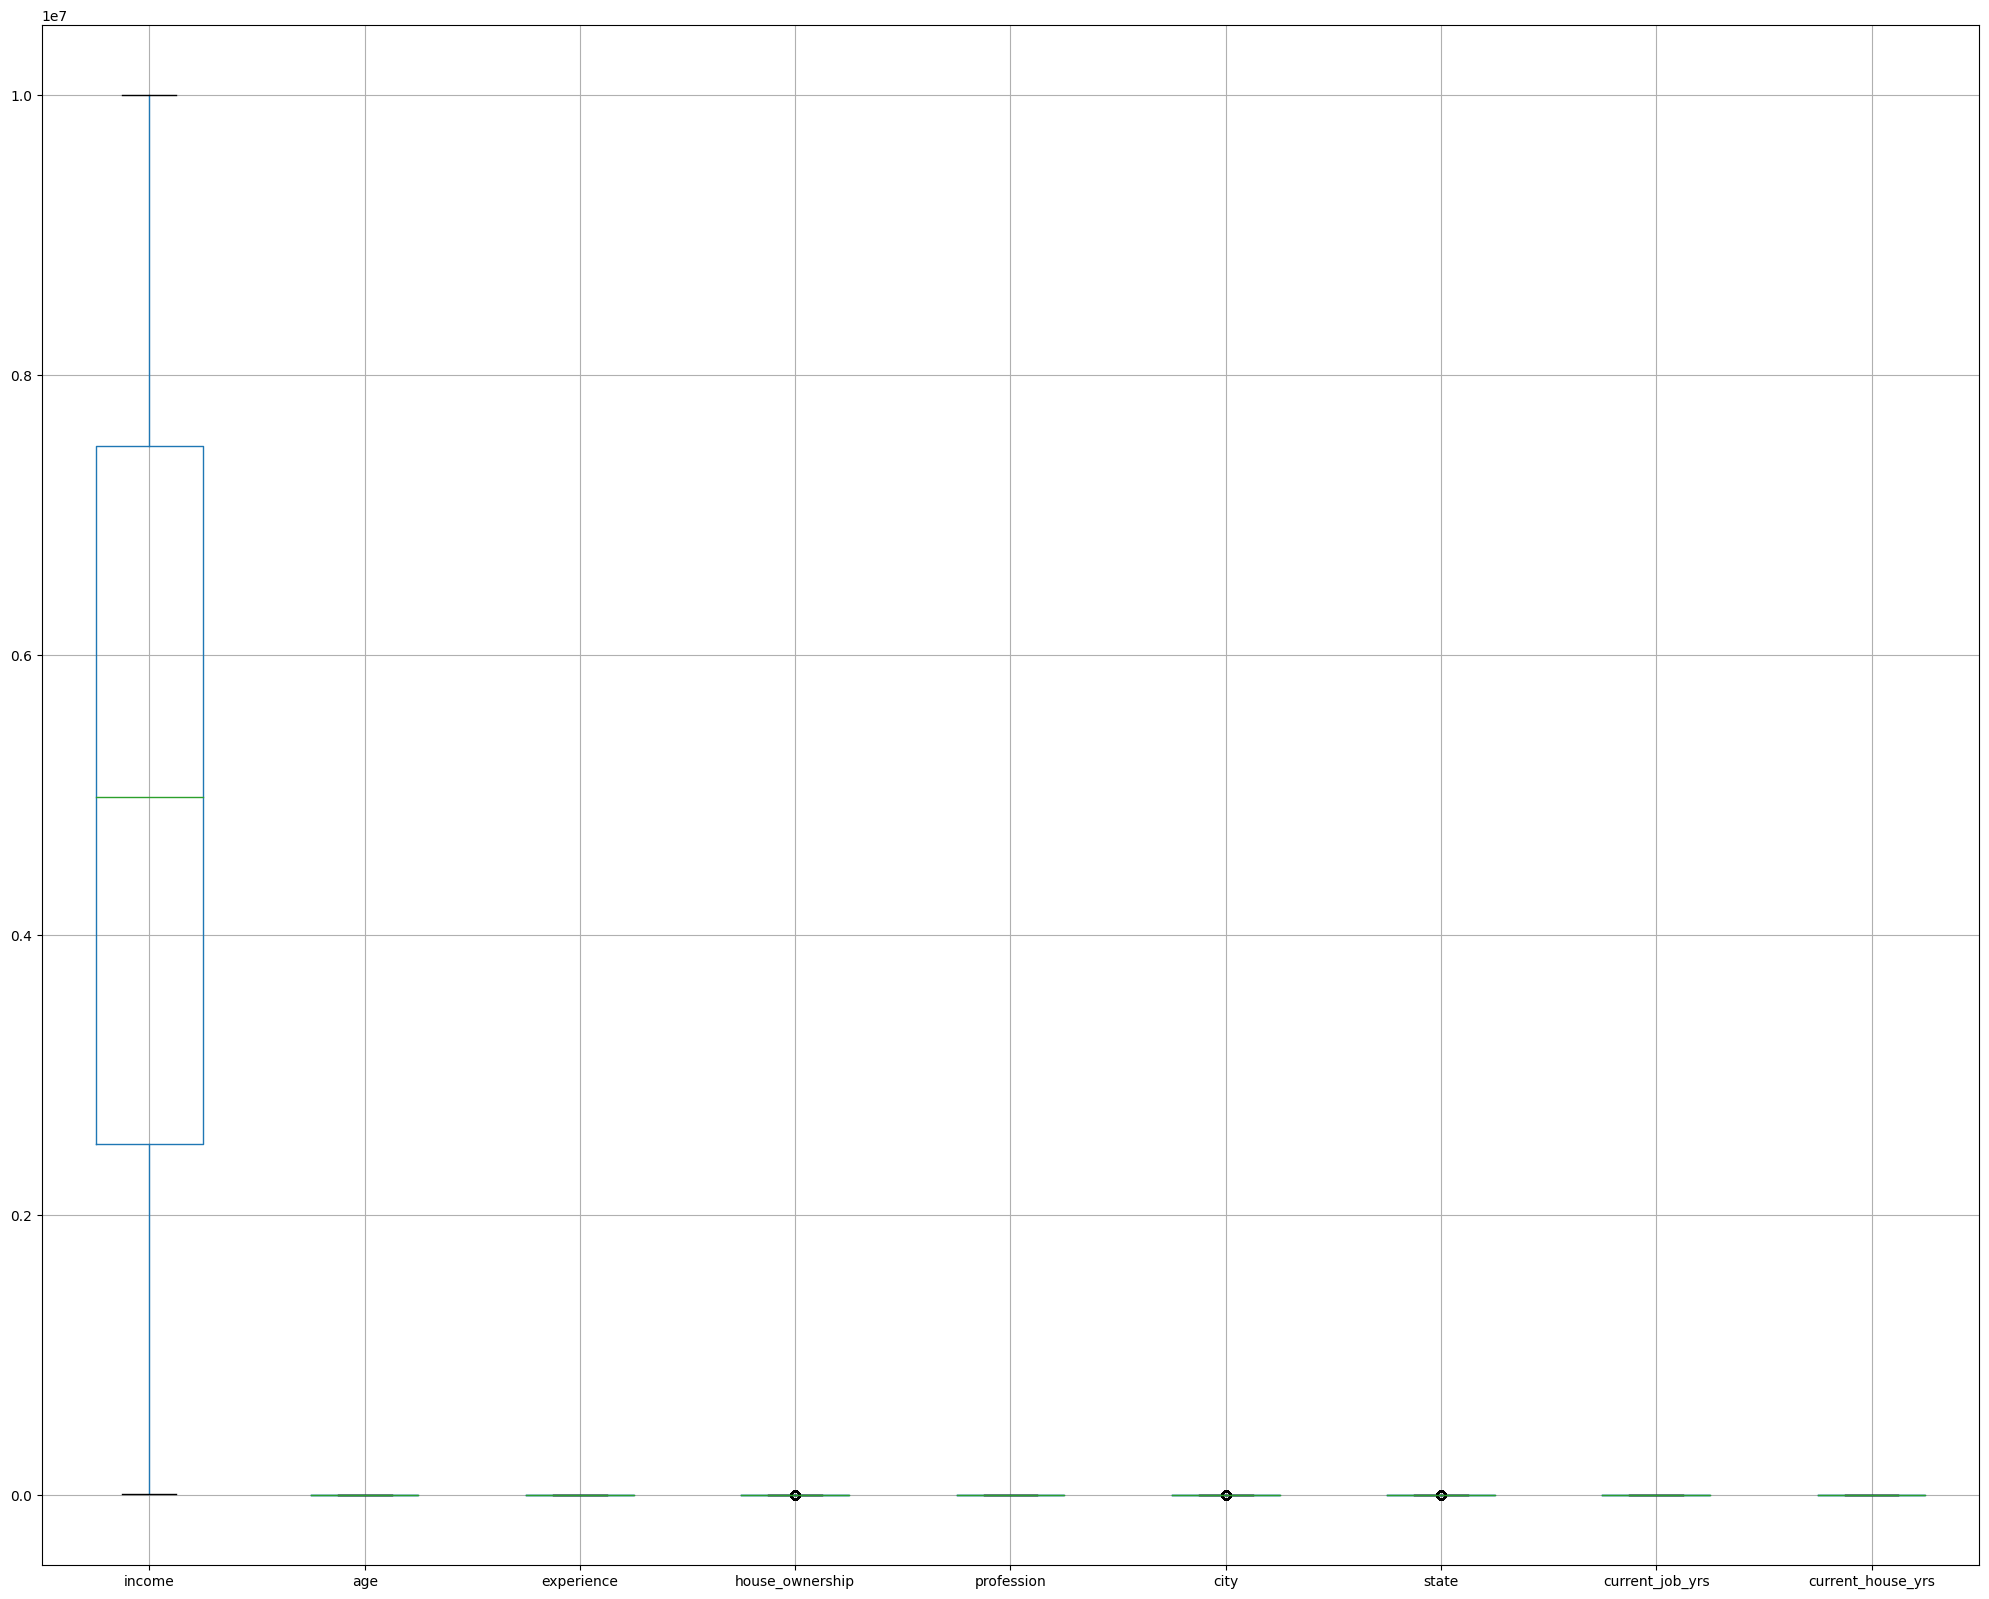

In [290]:
plt.figure(figsize=(25,20))
data.iloc[:,[0,1,2,4,6,7,8,9,10]].boxplot()

<Axes: >

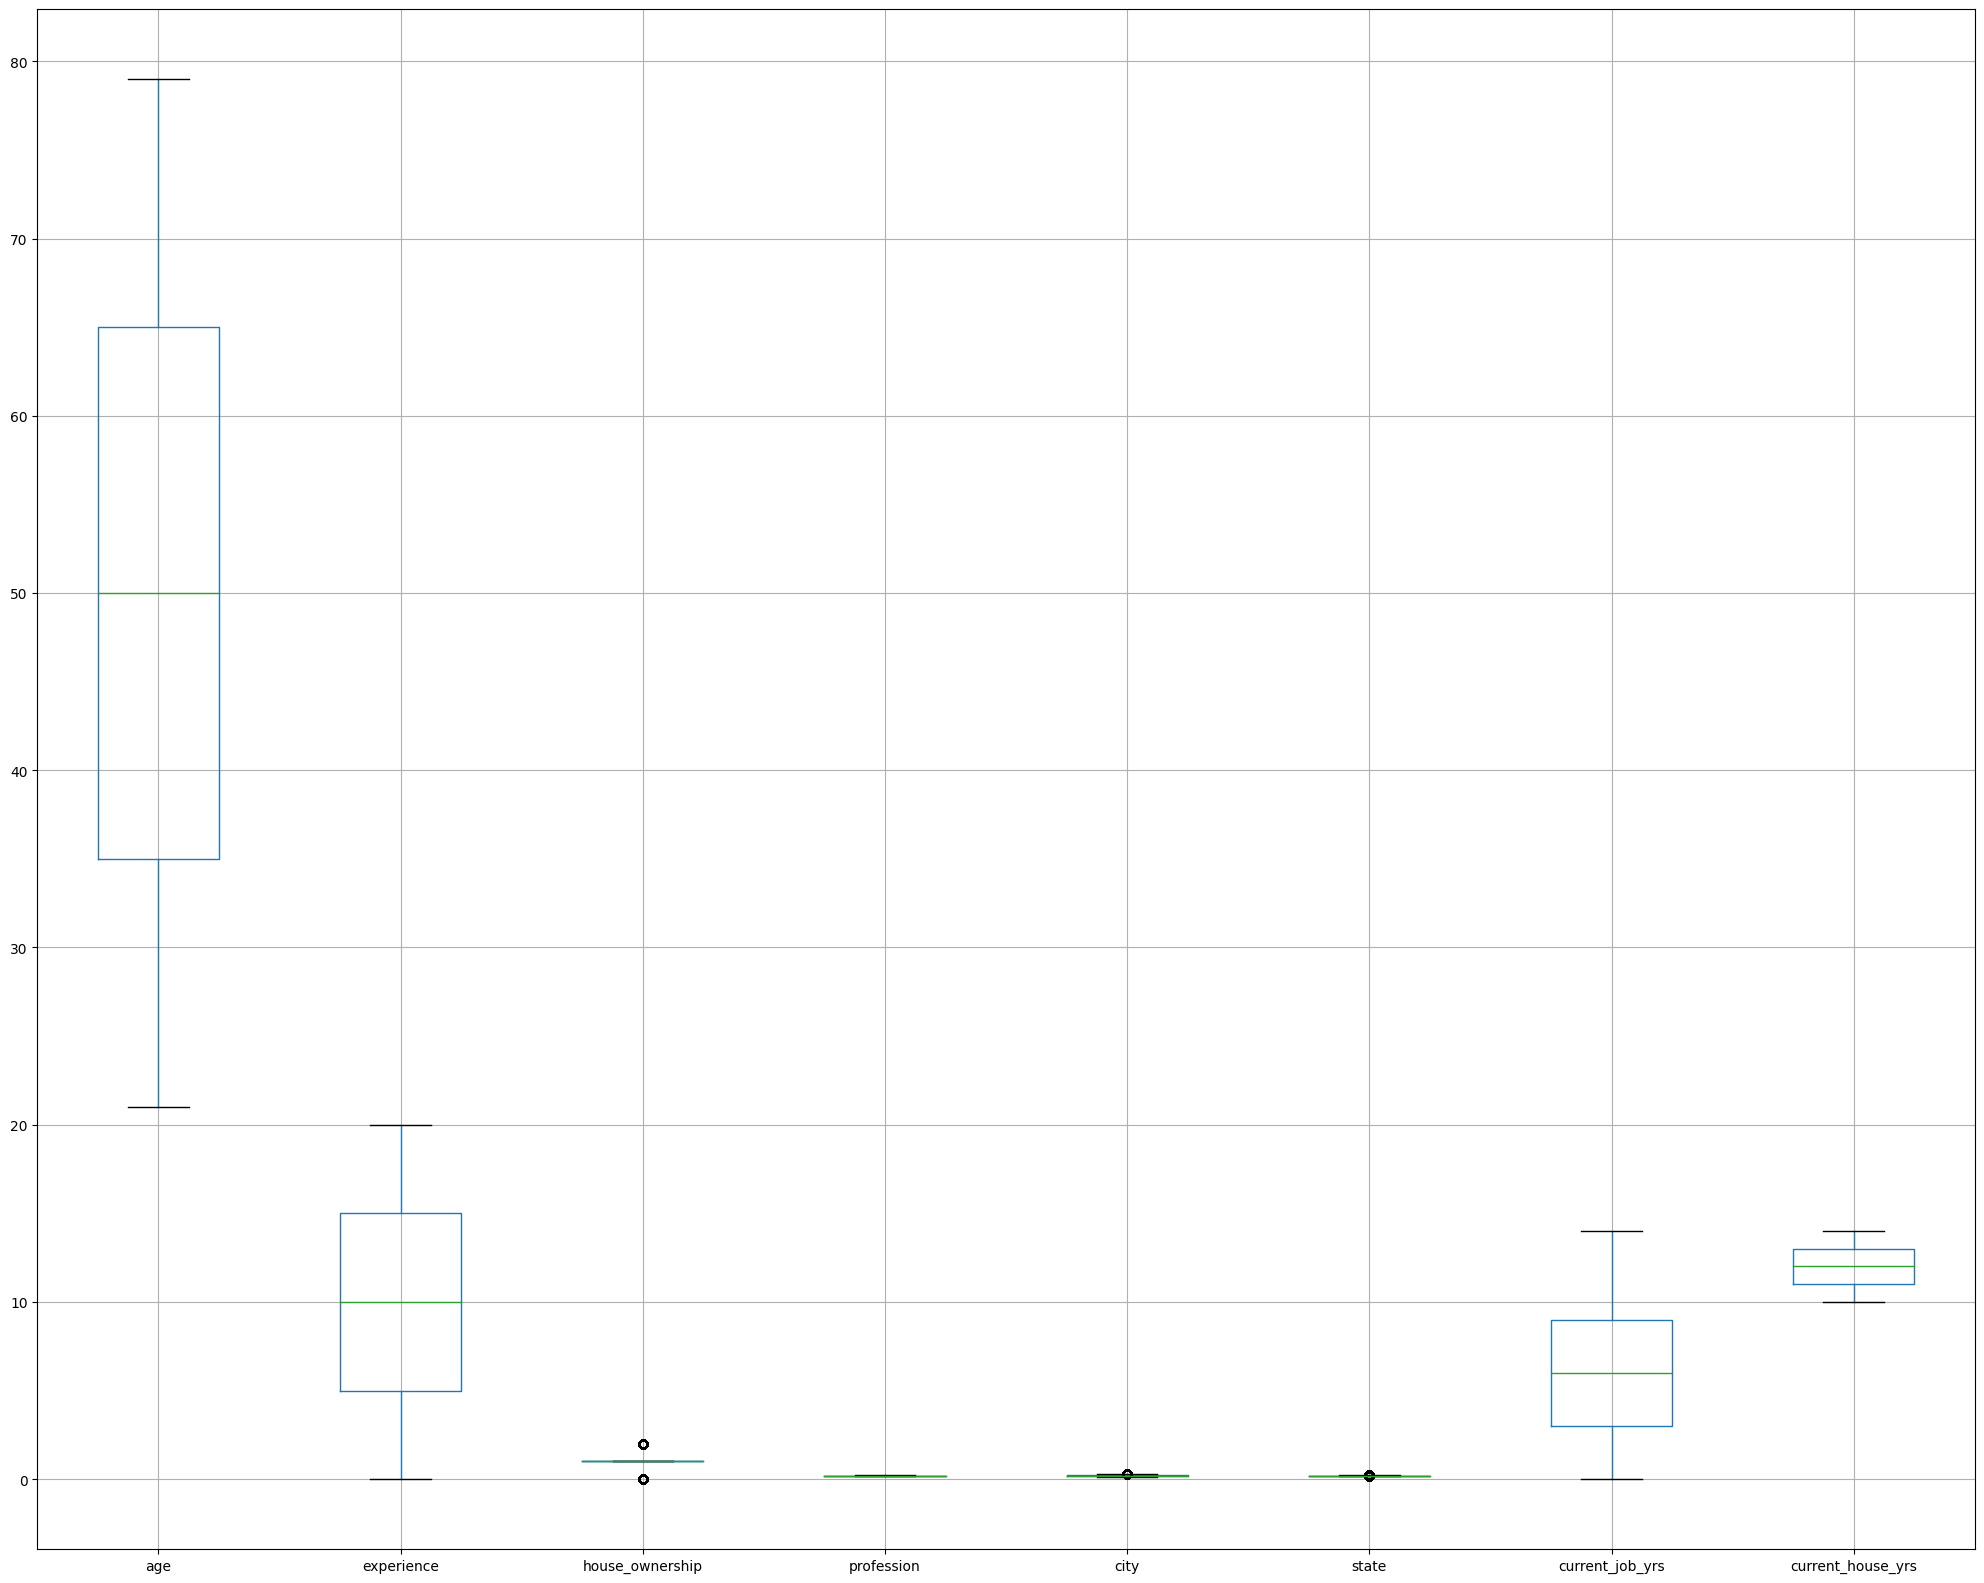

In [291]:
plt.figure(figsize=(25,20))
data.iloc[:,[1,2,4,6,7,8,9,10]].boxplot()

<Axes: >

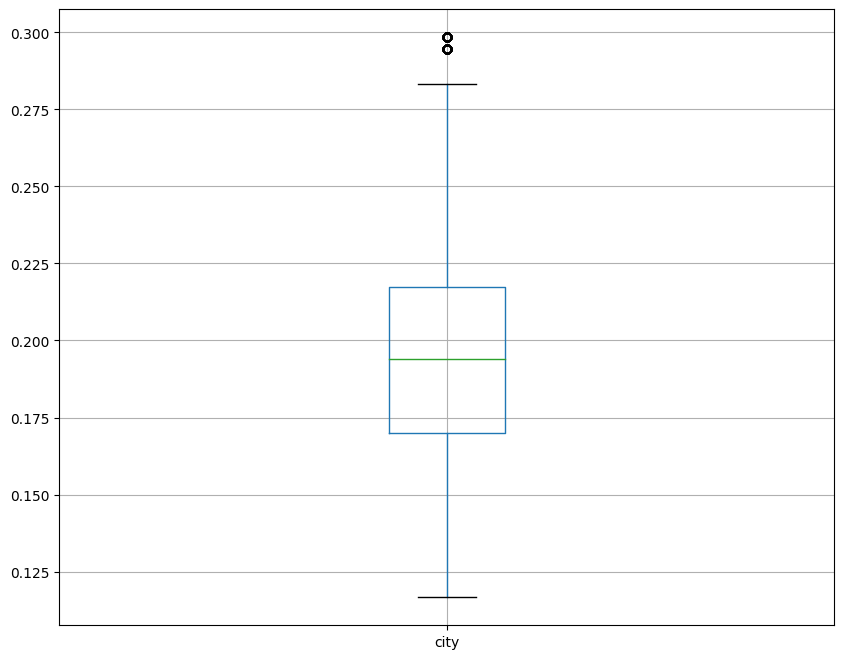

In [292]:
plt.figure(figsize=(10,8))
data.iloc[:,[7]].boxplot()

In [293]:
Q1 = data.iloc[:,7].quantile(0.25)
Q3 = data.iloc[:,7].quantile(0.75)

LB_7 = Q1 - 1.5 * (Q3 - Q1)
UB_7 = Q3 + 1.5 * (Q3 - Q1)

print(LB_7,UB_7)

0.09874999833840735 0.2885758249208361


In [294]:
upper_7 = data[data['city'] > UB_7 ].index
lower_7 = data[data['city'] < LB_7 ].index
print("upper_indexes : ",upper_7 ,"\nlower_indexes : ",lower_7)

upper_indexes :  Int64Index([     3,    582,    609,    699,    754,    964,   1356,   1476,
              1932,   2480,
            ...
            249277, 249347, 249562, 249782, 250442, 250888, 250958, 251119,
            251315, 251959],
           dtype='int64', length=253) 
lower_indexes :  Int64Index([], dtype='int64')


In [301]:
data_orig["city"].loc[upper_7].unique() # these 2 cities have more records with a target label of class 1

array(['Bhubaneswar', 'Yamunanagar'], dtype=object)

<Axes: >

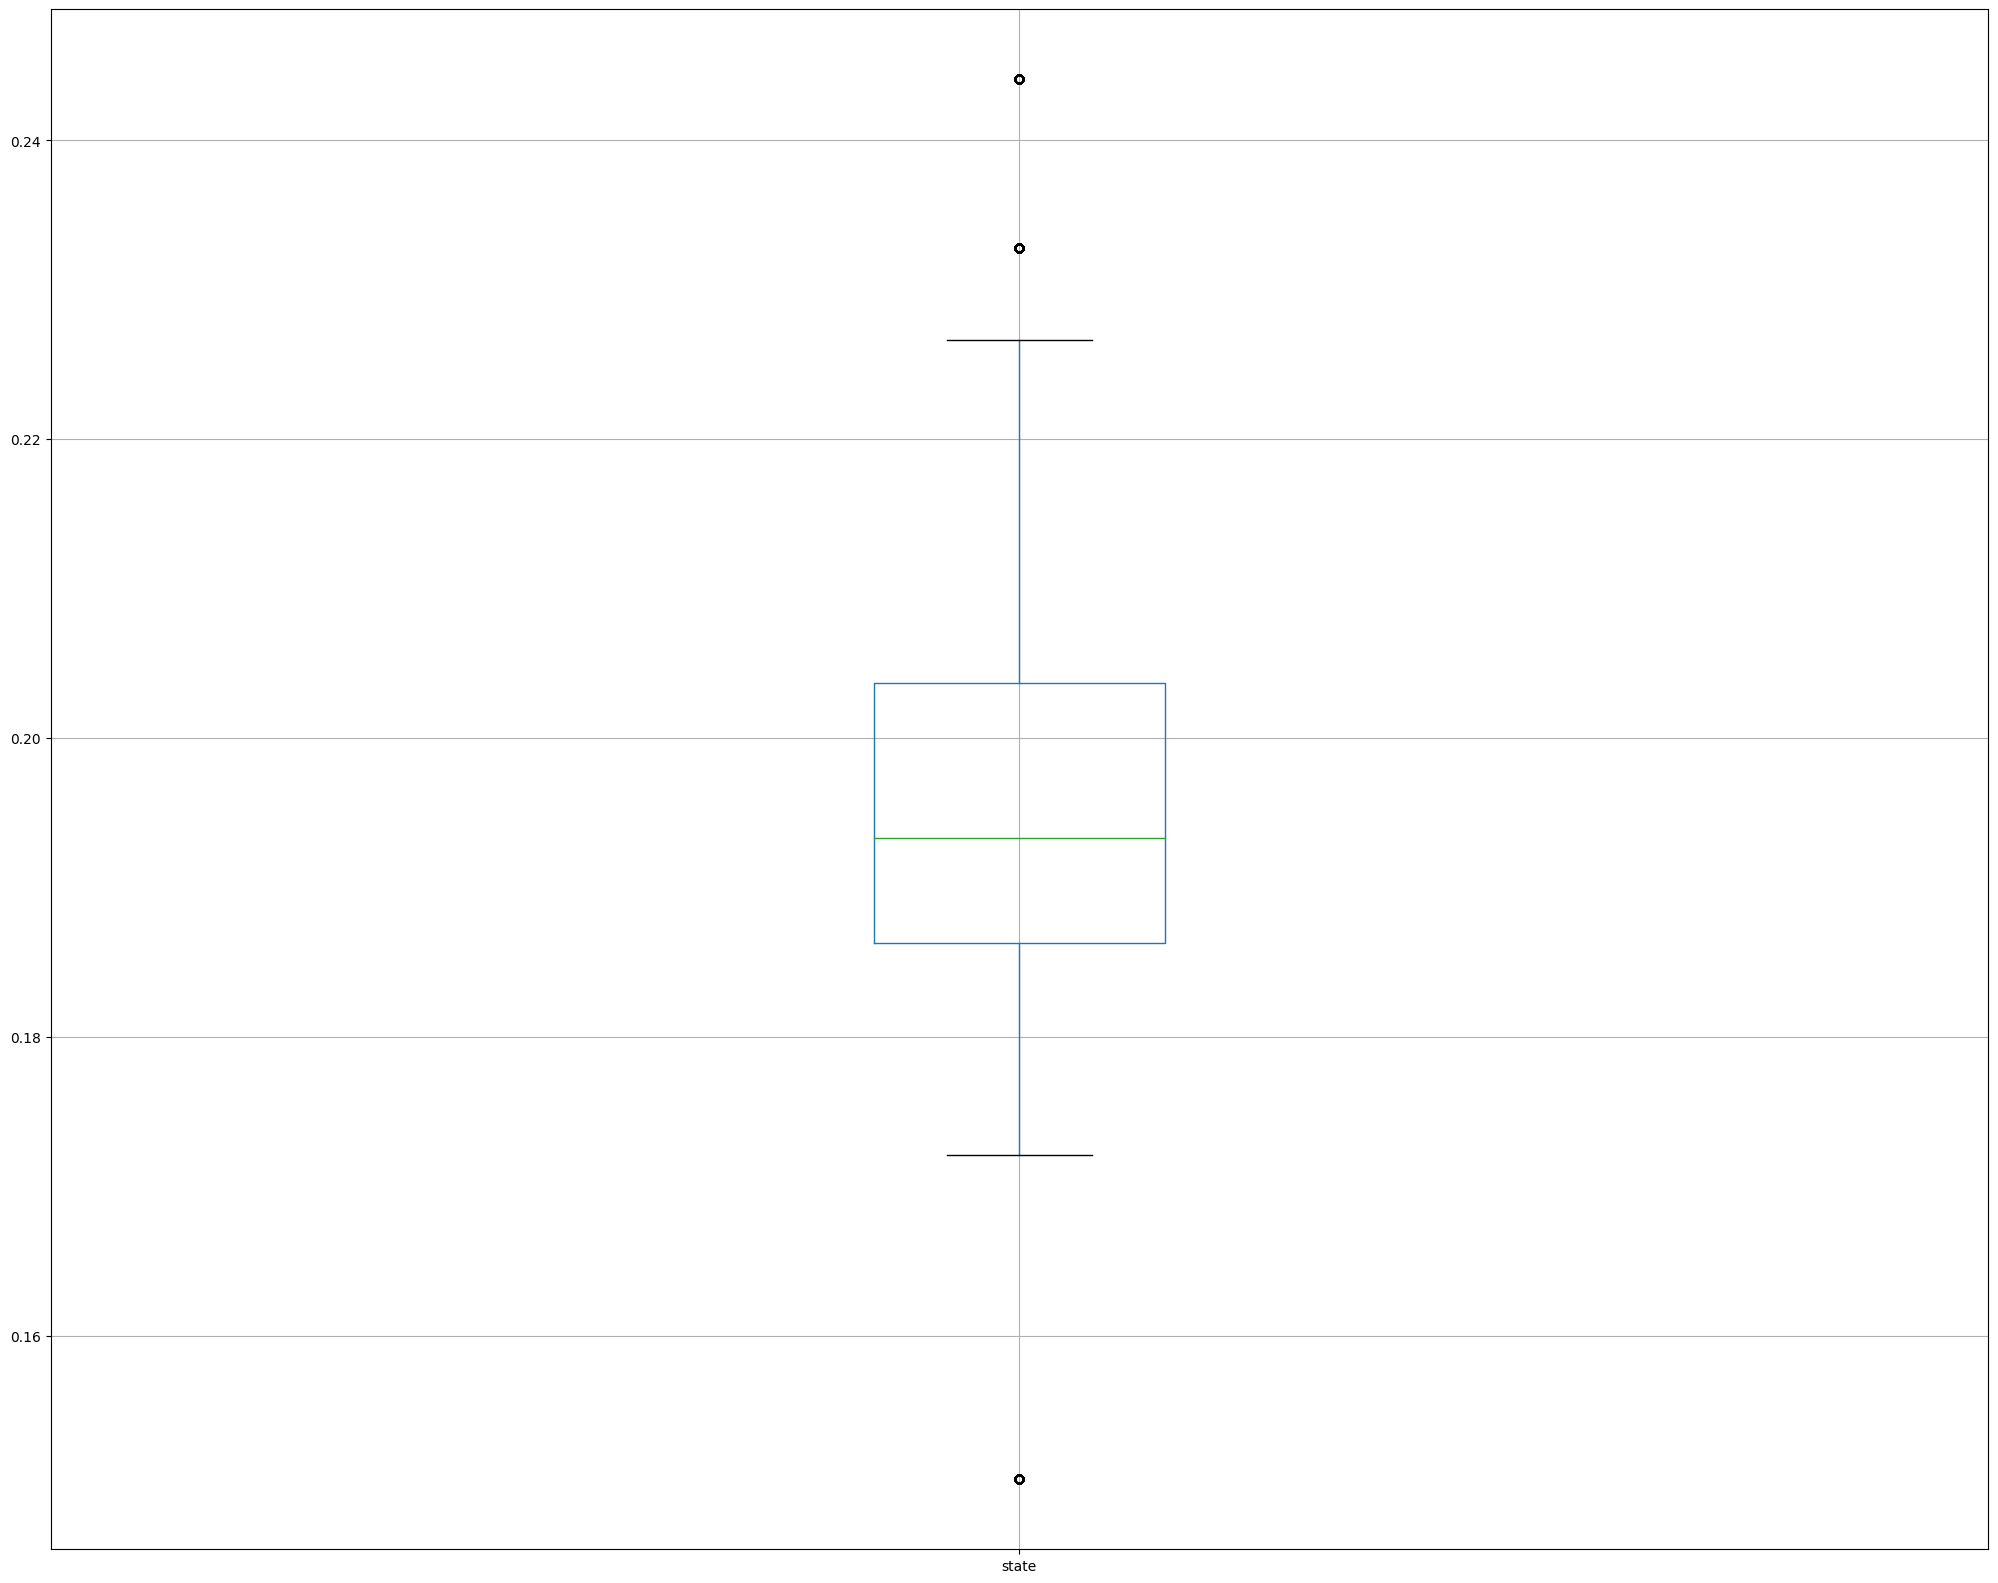

In [302]:
plt.figure(figsize=(25,20))
data.iloc[:,[8]].boxplot()

In [303]:
Q1 = data.iloc[:,8].quantile(0.25)
Q3 = data.iloc[:,8].quantile(0.75)

LB_8 = Q1 - 1.5 * (Q3 - Q1)
UB_8 = Q3 + 1.5 * (Q3 - Q1)

print(LB_8,UB_8)

0.1602392666843599 0.22973820849410337


In [304]:
upper_8 = data[data['state'] > UB_8].index
lower_8 = data[data['state'] < LB_8 ].index
print("upper_indexes : ",upper_8 ,"\nlower_indexes : ",lower_8)

upper_indexes :  Int64Index([    28,    141,    184,    355,    650,    702,    811,    963,
               984,   1080,
            ...
            251189, 251259, 251277, 251381, 251717, 251862, 251948, 251954,
            251967, 251998],
           dtype='int64', length=389) 
lower_indexes :  Int64Index([    75,    445,    487,    613,   1163,   1260,   1282,   1610,
              1614,   2621,
            ...
            248513, 248829, 249499, 249557, 250103, 250183, 250917, 251193,
            251595, 251974],
           dtype='int64', length=133)


In [306]:
data_orig["state"].loc[upper_8].unique() #these 2 states have more records with a target label of class 1

array(['Puducherry', 'Manipur'], dtype=object)

In [307]:
data_orig["state"].loc[lower_8].unique() #this state have more records with a target label of class 0

array(['Mizoram'], dtype=object)

# EDA

In [310]:
data.describe()

income           age    experience  married/single  \
count  4.319000e+04  43190.000000  43190.000000    43190.000000   
mean   4.999184e+06     49.917411      9.975041        0.100949   
std    2.883155e+06     17.056702      6.034418        0.301265   
min    1.031000e+04     21.000000      0.000000        0.000000   
25%    2.508307e+06     35.000000      5.000000        0.000000   
50%    4.984654e+06     50.000000     10.000000        0.000000   
75%    7.494142e+06     65.000000     15.000000        0.000000   
max    9.999938e+06     79.000000     20.000000        1.000000   

       house_ownership  car_ownership    profession          city  \
count     43190.000000   43190.000000  43190.000000  43190.000000   
mean          1.022621       0.295624      0.195485      0.195485   
std           0.284222       0.456328      0.012275      0.034369   
min           0.000000       0.000000      0.170429      0.116670   
25%           1.000000       0.000000      0.187279      0.169935   
50%           1.000000       0.000000      0.195122      0.194030   
75%           1.000000       1.000000      0.203585      0.217391   
max           2.000000       1.000000      0.224880      0.298384   

              state  current_job_yrs  current_house_yrs     risk_flag  
count  43190.000000     43190.000000       43190.000000  43190.000000  
mean       0.195485         6.298981          12.006275      0.195485  
std        0.011119         3.663603           1.412652      0.396578  
min        0.150376         0.000000          10.000000      0.000000  
25%        0.186301         3.000000          11.000000      0.000000  
50%        0.193318         6.000000          12.000000      0.000000  
75%        0.203676         9.000000          13.000000      0.000000  
max        0.244093        14.000000          14.000000      1.000000

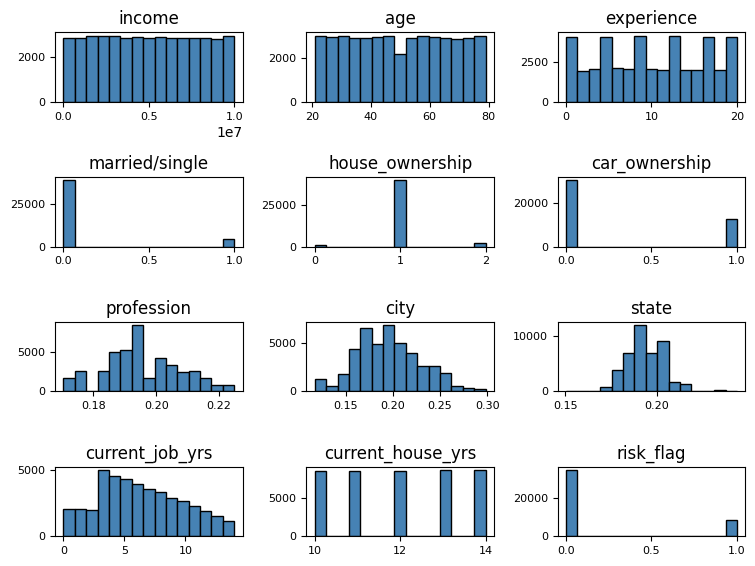

In [311]:
data.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)
plt.tight_layout(rect=(0, 0, 1.2, 1.2))
plt.show()

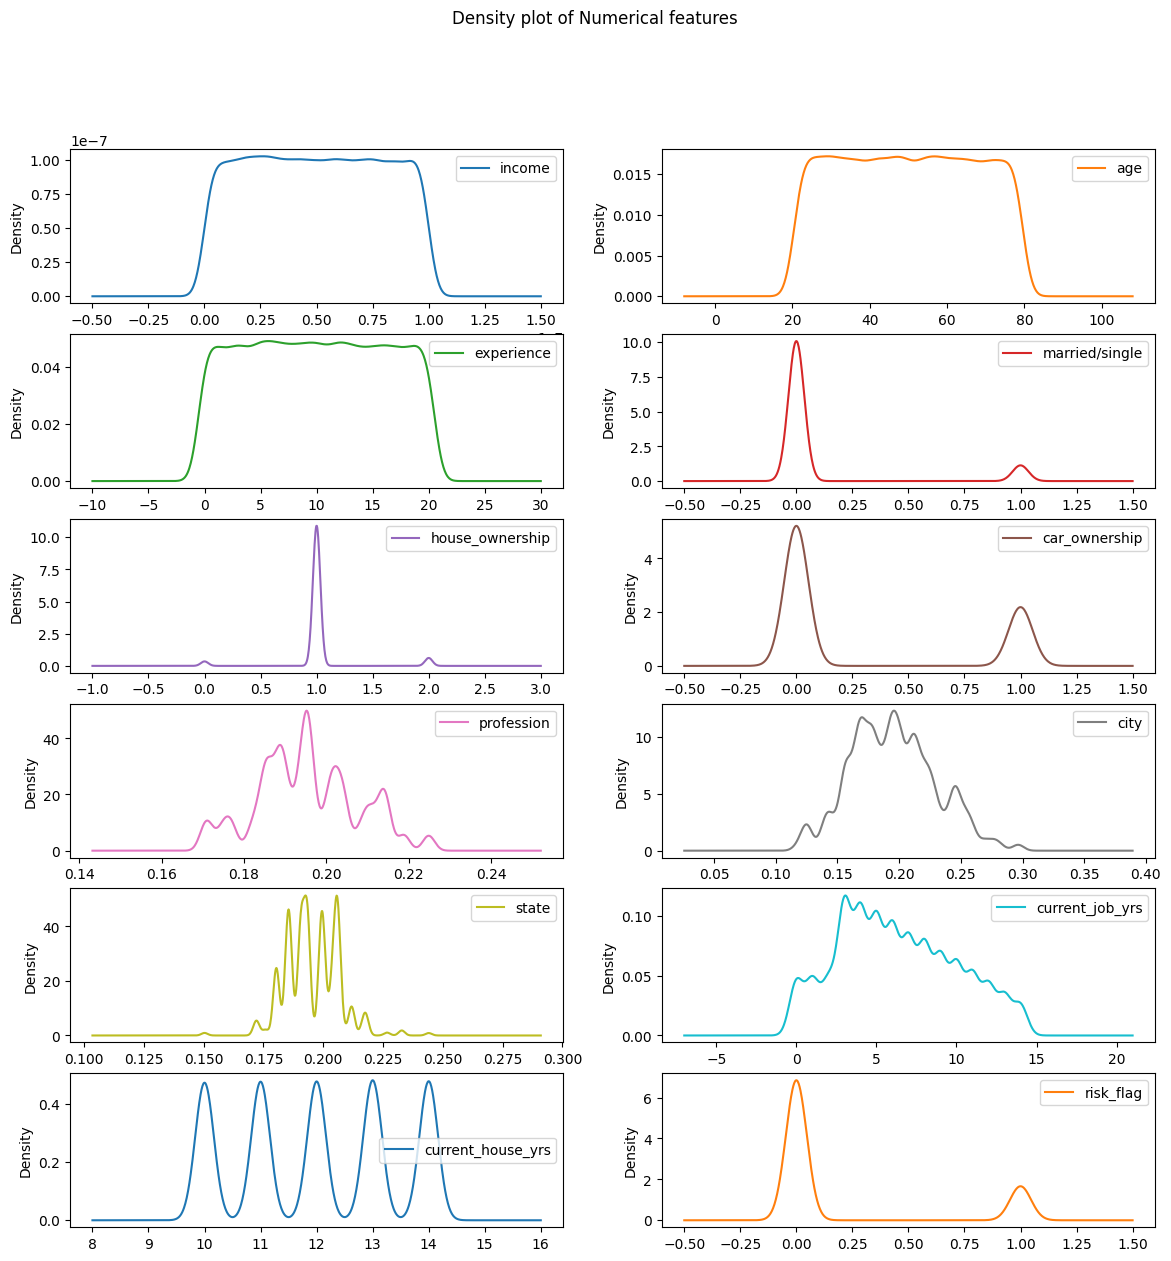

In [312]:
data.plot(kind='density',figsize=(14,14),subplots=True,layout=(6,2),title="Density plot of Numerical features",sharex=False)
plt.show()

### observation
#### -smoothed representation of the distribution of  continuous variables.
#### -we have several multi modal distributions such as current house years, state and profession.


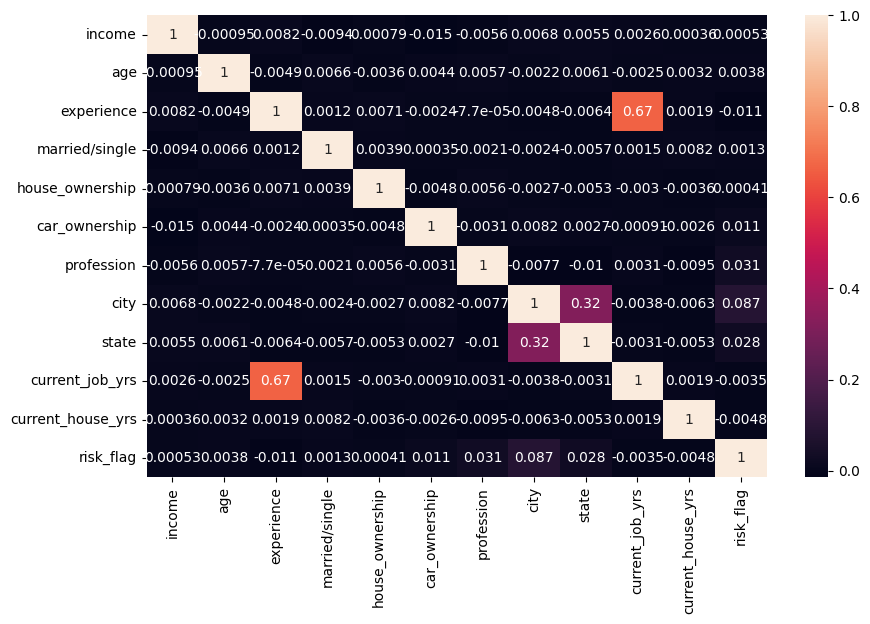

In [313]:
# Plot correlation matrix in heatmap
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(data.corr(), ax=ax, annot=True)
plt.show()

### Observations
#### -Feature like current_job_yrs and experiance carry similar informations and hense show higher correlation
#### -City Feature show positive correleation with risk flag

In [353]:
def data_stats(df, query_col, target_col, aggregation_func=np.mean, columns_list=None):


    #functions describe the basic stats (count, probability) groupby operations based on query column on target column


    print(f'Total defaulters based on {query_col} \n')
    print(pd.crosstab(df[query_col], df[target_col], margins='True'))
    print("="*50)
    print(f'Proportion of defaulters based on {query_col} \n')
    print(pd.pivot_table(data=df, index=query_col, values=target_col, aggfunc=aggregation_func, columns=columns_list,sort=True))


def plot_bargraph(data,  xtick, target_col, measure_col='total_records'):

     #functions plot the bar graph based on filtered dataframe

    index = np.arange(data.shape[0])
    plt.figure(figsize=(16,8))
    p1 = plt.bar(index, data[measure_col].values, color='g')
    p2 = plt.bar(index, data[target_col].values, color='r')

    plt.xlabel(xtick)
    plt.ylabel('Records')
    plt.title(f'{xtick.upper()} wise Loan At Risk')
    plt.xticks(index, list(data[xtick].values),rotation=90)
    plt.legend((p1[0], p2[0]),('total','@risk'))

    plt.show()

def univariate_barplot(data, query_col, targate_col, top=False):

   #functions perform groupby operation on query column to find the basic stats like count of occurences
   #based on query column on target column

    temp = data.groupby([query_col])[targate_col].agg(lambda x:x.eq(1).sum()).reset_index()
    temp['total_records'] = data.groupby([query_col])[targate_col].agg(total='count').reset_index()['total']
    temp['Average_@risk'] = data.groupby([query_col])[targate_col].agg(Avg='mean').reset_index()['Avg']

    temp.sort_values(by=['total_records'],inplace=True, ascending=False)


    if top:
        temp = temp[0:top]
    plot_bargraph(temp, xtick=query_col, target_col=targate_col)
    temp.sort_values(by='Average_@risk',inplace=True)
    print(f'Top 5 with LeasT Default Rate: {query_col.upper()}')
    print(temp.head(5))
    print("="*50)
    print(f'Top 5 with Most Default Rate: {query_col.upper()}')
    print(temp.tail(5))

### Observations
#### Clear case of class imbalance most records indicates (approx. 80 %) belongs to class 0 & approx. 20% to class 1


In [316]:
print('Percentage of data belonging to Class 0 :', (data['risk_flag'].value_counts()[0]/data.shape[0])*100,'%')
print('Percentage of data belonging to Class 1 :', (data['risk_flag'].value_counts()[1]/data.shape[0])*100,'%')

Percentage of data belonging to Class 0 : 80.45149340125029 %
Percentage of data belonging to Class 1 : 19.54850659874971 %


<Axes: xlabel='risk_flag', ylabel='count'>

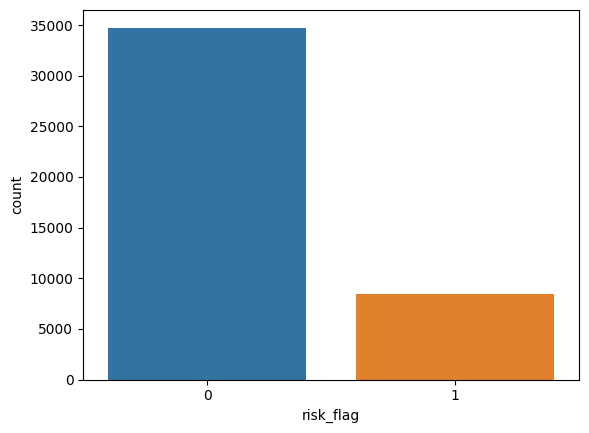

In [317]:
sns.countplot(x = 'risk_flag',data = data_orig )

## Marital Status

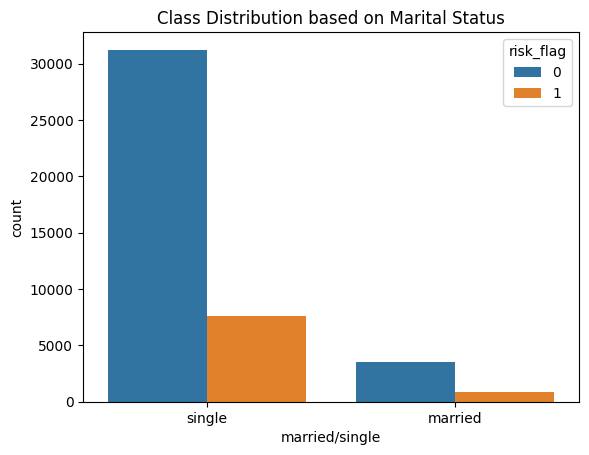

In [318]:
sns.countplot(x="married/single", data=data_orig, hue='risk_flag')
plt.title('Class Distribution based on Marital Status')
plt.show()

In [319]:
data_stats(data_orig, query_col = "married/single" , target_col = "risk_flag")

Total defaulters based on married/single 

risk_flag           0     1    All
married/single                    
married          3501   859   4360
single          31246  7584  38830
All             34747  8443  43190
Proportion of defaulters based on married/single 

                risk_flag
married/single           
married          0.197018
single           0.195313


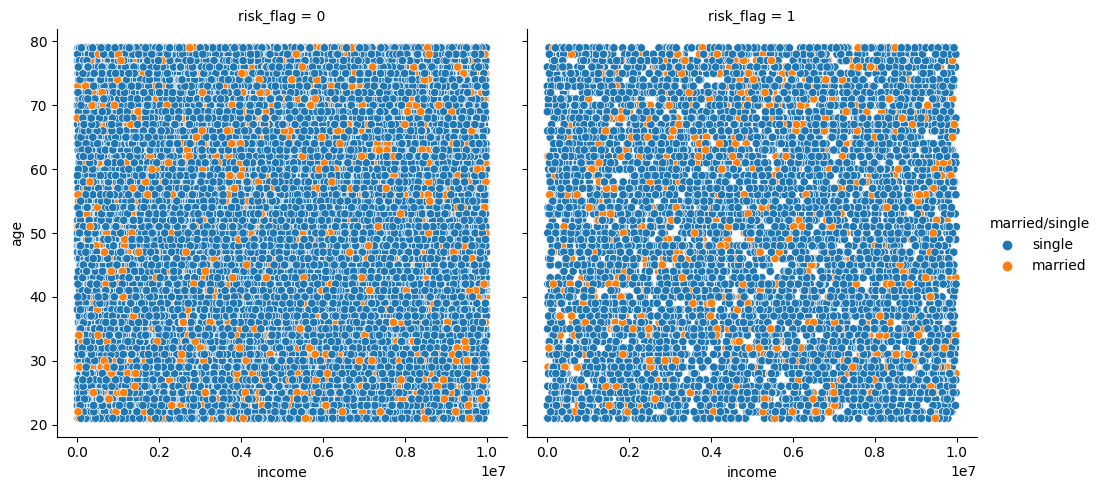

In [322]:
sns.relplot(
    data=data_orig,
    x="income", y="age", hue="married/single", col="risk_flag",
)

### Observations
#### Major chuck of a customer approx 90% data belongs to unmarried(single) category which is unusual as married people take the loan more often for building home and other but they consist of only 10% of overall data.
#### -Interesting to see that still the loan default rate for married  and unmarried (single) is 20%.


## Car-ownership

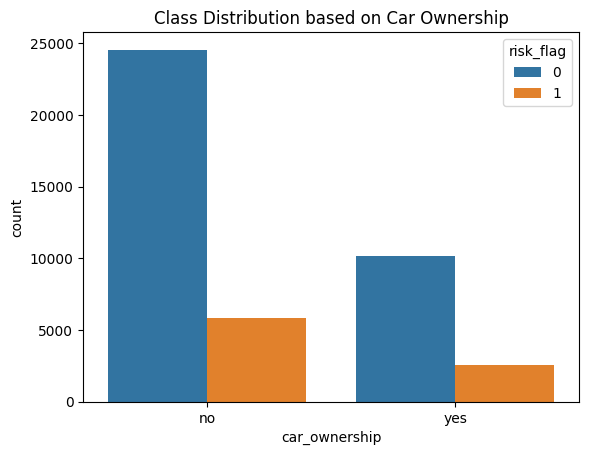

In [324]:
sns.countplot(x='car_ownership',data=data_orig, hue='risk_flag')
plt.title('Class Distribution based on Car Ownership')
plt.show()

In [325]:
data_stats(data_orig,'car_ownership', 'risk_flag',)


Total defaulters based on car_ownership 

risk_flag          0     1    All
car_ownership                    
no             24563  5859  30422
yes            10184  2584  12768
All            34747  8443  43190
Proportion of defaulters based on car_ownership 

               risk_flag
car_ownership           
no              0.192591
yes             0.202381


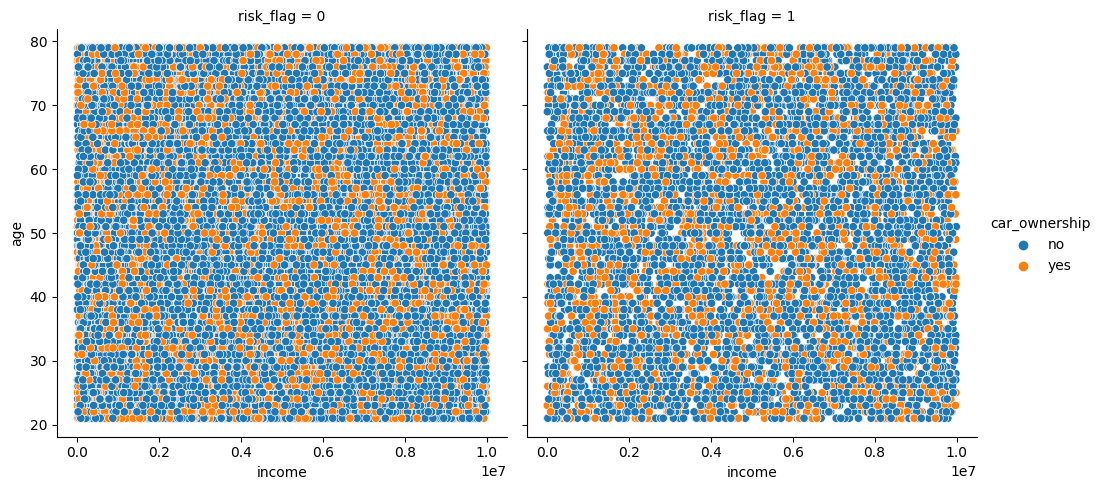

In [326]:
sns.relplot(
    data=data_orig,
    x="income", y="age", hue="car_ownership", col="risk_flag",
)

### Observations
#### Only 30% customer owns the car where as 70% don't have any car.
#### Considering the record number we see the defualt rate which is 19% for not having car and 20% having car-ownership.
#### But having An asset increase customer credit and we still see small but valid difference in defualt rate of 1% approx.

## House Ownership

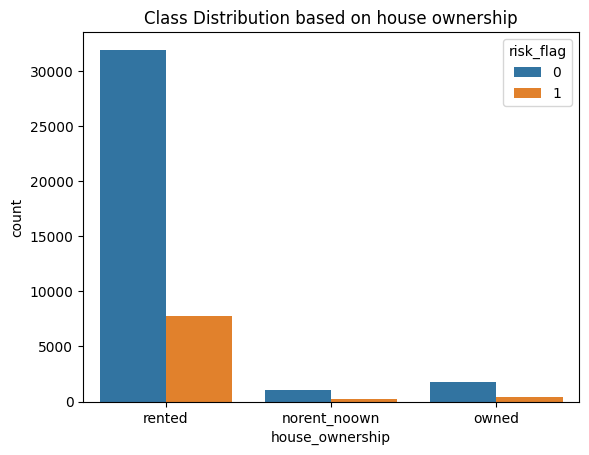

In [327]:
sns.countplot(x='house_ownership',data=data_orig, hue='risk_flag')
plt.title('Class Distribution based on house ownership')
plt.show()

In [328]:
data_stats(data_orig,'house_ownership', 'risk_flag',)


Total defaulters based on house_ownership 

risk_flag            0     1    All
house_ownership                    
norent_noown      1010   257   1267
owned             1794   450   2244
rented           31943  7736  39679
All              34747  8443  43190
Proportion of defaulters based on house_ownership 

                 risk_flag
house_ownership           
norent_noown      0.202841
owned             0.200535
rented            0.194965


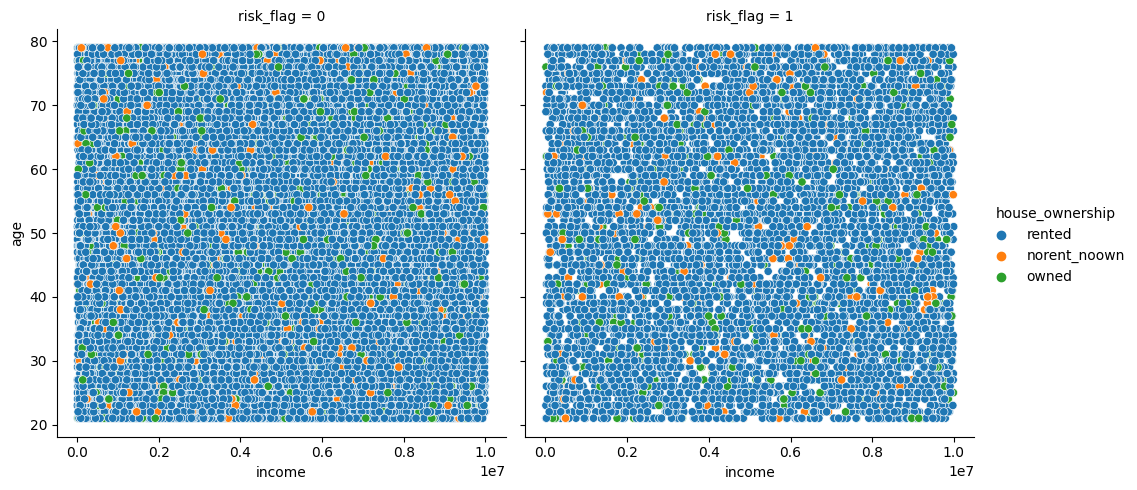

In [329]:
sns.relplot(
    data=data_orig,
    x="income", y="age", hue="house_ownership", col="risk_flag",
)

### Observations
#### -Measuring the category distribution 3% belongs to not rented/not own, approx. 4% belongs to owned and more than 92% belongs to rented customers.

#### -all of defualt rates in each categoryis approx 20%


## Customer Age

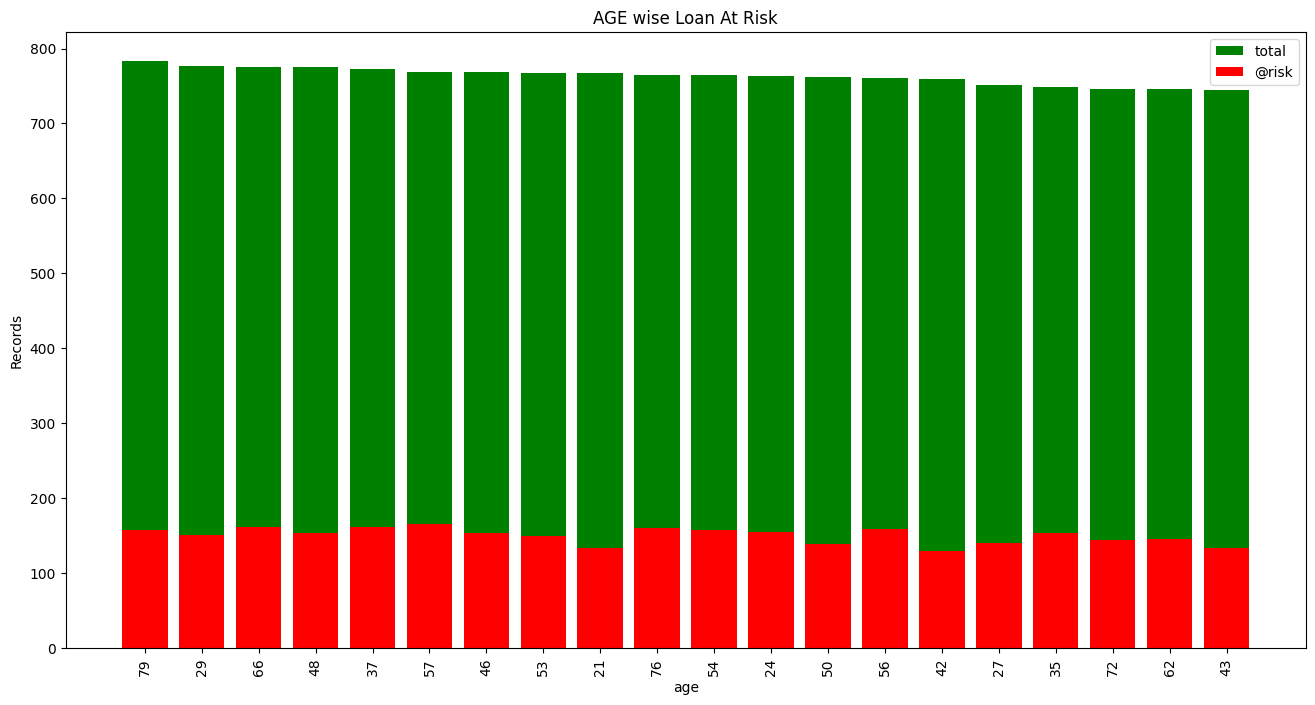

Top 5 with LeasT Default Rate: AGE
    age  risk_flag  total_records  Average_@risk
21   42        130            759       0.171278
0    21        134            767       0.174707
22   43        134            745       0.179866
29   50        139            762       0.182415
6    27        140            752       0.186170
Top 5 with Most Default Rate: AGE
    age  risk_flag  total_records  Average_@risk
16   37        161            773       0.208279
45   66        162            776       0.208763
35   56        159            761       0.208936
55   76        160            765       0.209150
36   57        165            769       0.214564


In [330]:
univariate_barplot(data_orig, 'age', 'risk_flag', top=20)


### Observations
#### -Looking at the Bar Chart we have Age Range of 21 to 79
#### -Customer with Age 79 has highest number of total record count  followed by 66
#### -We observ approx. similar distribution of total record count and  defualt rate


## Age Type

In [331]:
def age_type(age):
    if age > 19 and  age <= 29:
        return 'Young'
    elif age > 29 and age <= 39:
        return 'Adults'
    elif age > 39 and age <= 60:
        return 'Middle'
    else:
        return 'old'

In [332]:
# https://www.researchgate.net/figure/Age-intervals-and-age-groups_tbl1_228404297#:~:text=The%20adopted%20age%20groups%20are0,...
data_orig['age_type'] = data_orig.age.map(age_type)
data_orig.age_type.value_counts()

Middle    15419
old       13798
Adults     7286
Young      6687
Name: age_type, dtype: int64

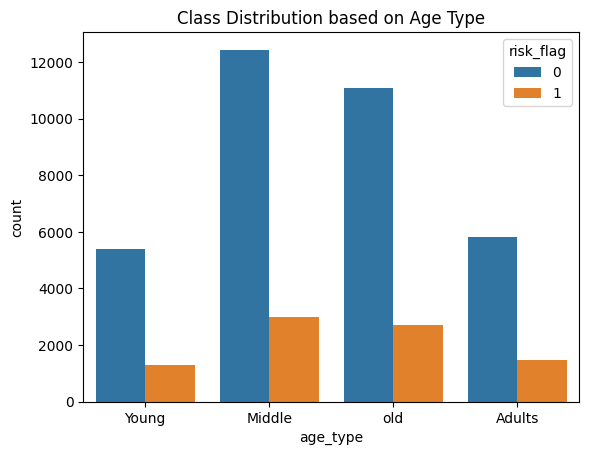

In [333]:
sns.countplot(x='age_type', data=data_orig, hue='risk_flag')
plt.title('Class Distribution based on Age Type')
plt.show()

In [334]:
data_stats(data_orig,'age_type', 'risk_flag')


Total defaulters based on age_type 

risk_flag      0     1    All
age_type                     
Adults      5823  1463   7286
Middle     12431  2988  15419
Young       5403  1284   6687
old        11090  2708  13798
All        34747  8443  43190
Proportion of defaulters based on age_type 

          risk_flag
age_type           
Adults     0.200796
Middle     0.193787
Young      0.192014
old        0.196260


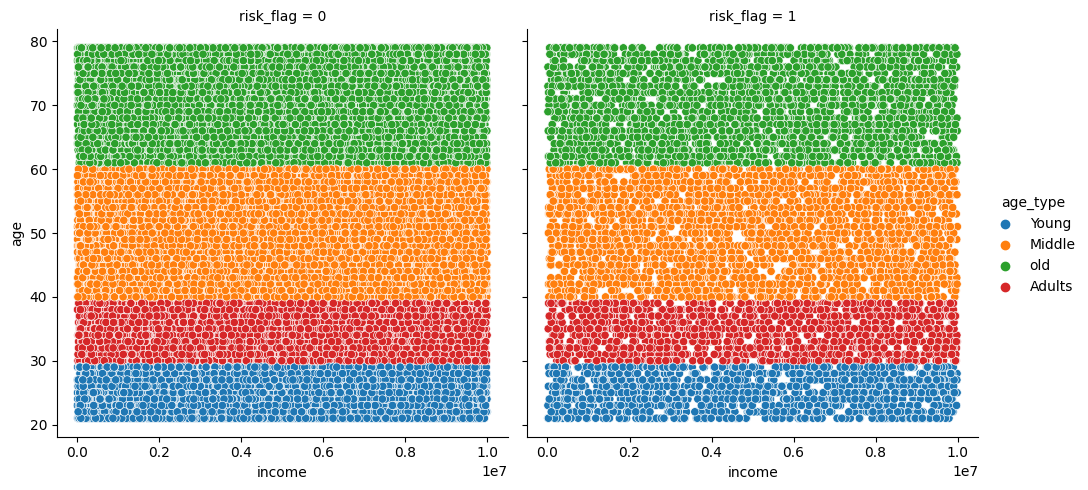

In [335]:
sns.relplot(
    data=data_orig,
    x="income", y="age", hue="age_type", col="risk_flag",
)

### Observations
### -Over 15K customer Aged group as Middle Age customer, 14K as old , 7K as Adults and 7K as Young customers
### -Comparing the default rate we see that Younger customer has higher rate of default

## State, City and profession

In [336]:
city=dict(data_orig.groupby('city')['risk_flag'].mean())
c = sorted(city.items(),key=lambda x:x[1],reverse=True)
print('Top 3 cities with Risk flag are:')
c[0:3]

Top 3 cities with Risk flag are:


[('Yamunanagar', 0.29838709677419356),
 ('Bhubaneswar', 0.29457364341085274),
 ('Nagercoil', 0.2833333333333333)]

In [337]:
state=dict(data_orig.groupby('state')['risk_flag'].mean())
s = sorted(state.items(),key=lambda x:x[1],reverse=True)
print('Top 3 States with Risk flag are:')
s[0:3]

Top 3 States with Risk flag are:


[('Manipur', 0.2440944881889764),
 ('Puducherry', 0.23282442748091603),
 ('Tripura', 0.22666666666666666)]

In [338]:
pro=dict(data_orig.groupby('profession')['risk_flag'].mean())
p = sorted(pro.items(),key=lambda x:x[1],reverse=True)
print('Top 3 professions with Risk flag are:')
p[0:3]

Top 3 professions with Risk flag are:


[('Psychologist', 0.22488038277511962),
 ('Technician', 0.21885913853317812),
 ('Army_officer', 0.21473158551810237)]

### observation
#### -these cities, states and professions are the ones that is more likely to be considered for loan defaults

### state

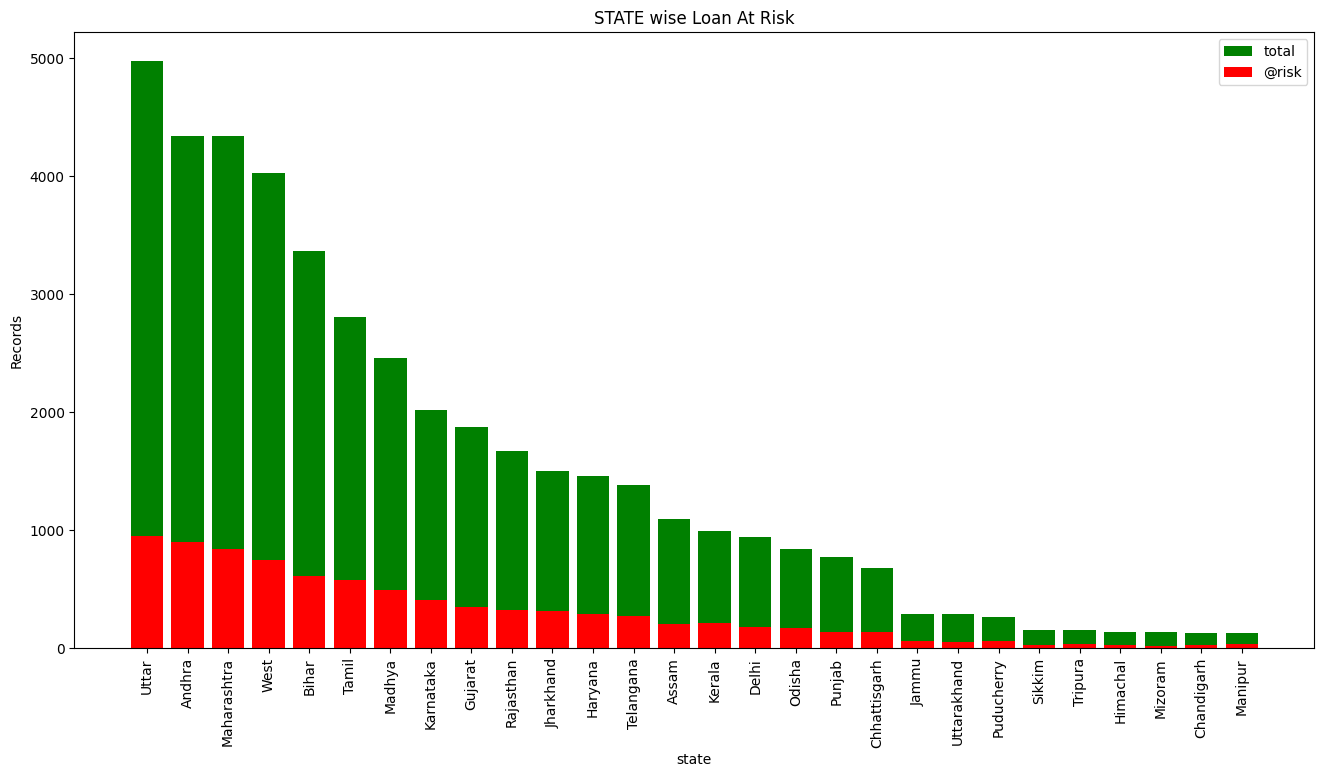

Top 5 with LeasT Default Rate: STATE
          state  risk_flag  total_records  Average_@risk
16      Mizoram         20            133       0.150376
19       Punjab        133            773       0.172057
26  Uttarakhand         51            290       0.175862
2         Bihar        607           3365       0.180386
21       Sikkim         28            155       0.180645
Top 5 with Most Default Rate: STATE
         state  risk_flag  total_records  Average_@risk
9        Jammu         63            291       0.216495
12      Kerala        216            992       0.217742
24     Tripura         34            150       0.226667
18  Puducherry         61            262       0.232824
15     Manipur         31            127       0.244094


In [339]:
univariate_barplot(data_orig, 'state', 'risk_flag' )


### Observations
#### -Top 5 state with highest total records Uttar >Aadhra  > Maharastra > West  > Bihar the major of records data are coming from these five states .
#### -The state Mizoramm has least default rate.
#### -The State Manipur has highest default rate of 24.4 %
#### -State is one of the crucial feature shows the customer financial behaviour in different region on high level.


### city

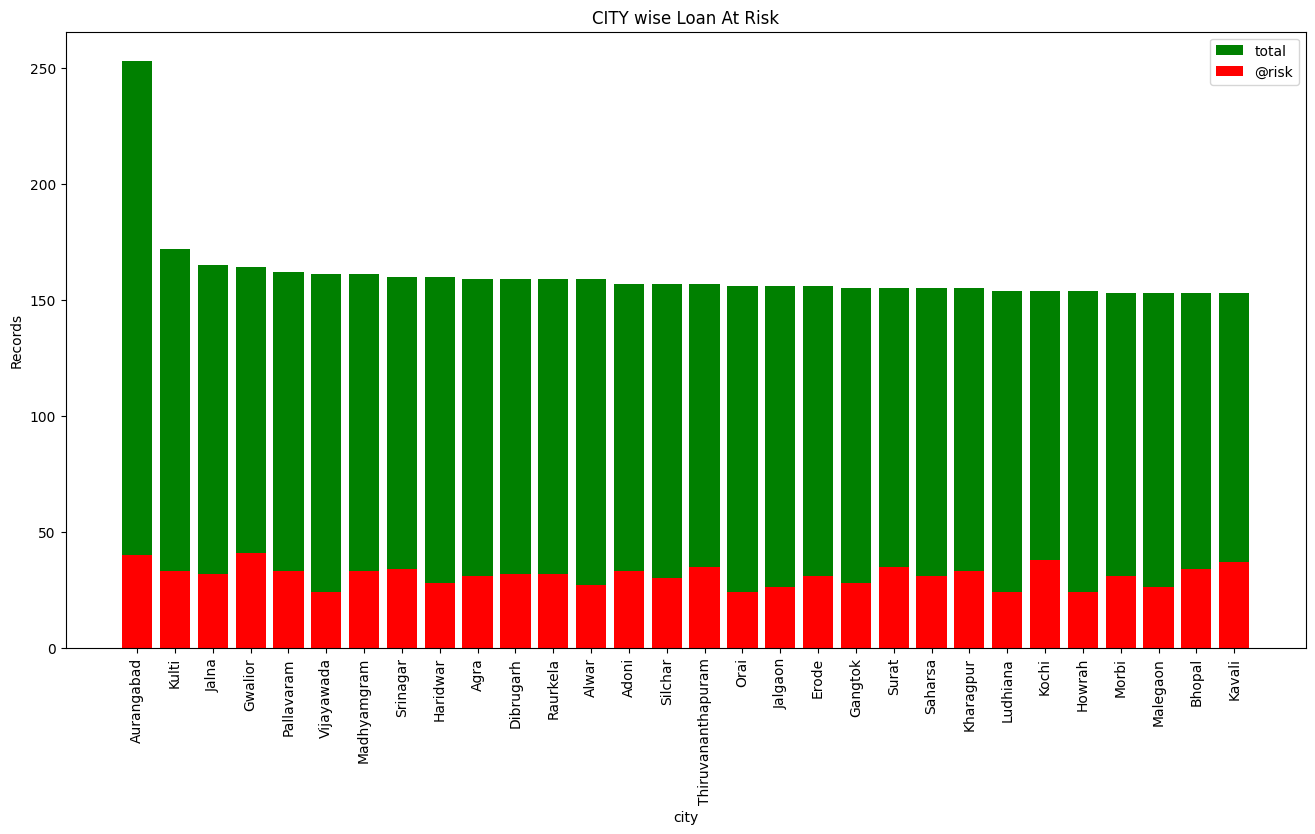

Top 5 with LeasT Default Rate: CITY
           city  risk_flag  total_records  Average_@risk
312  Vijayawada         24            161       0.149068
218        Orai         24            156       0.153846
120      Howrah         24            154       0.155844
173    Ludhiana         24            154       0.155844
24   Aurangabad         40            253       0.158103
Top 5 with Most Default Rate: CITY
                   city  risk_flag  total_records  Average_@risk
291  Thiruvananthapuram         35            157       0.222930
282               Surat         35            155       0.225806
152              Kavali         37            153       0.241830
159               Kochi         38            154       0.246753
111             Gwalior         41            164       0.250000


In [340]:
univariate_barplot(data_orig, 'city', 'risk_flag',top=30)


In [341]:
state_group_df =data_orig.groupby(['state','city'])['risk_flag'].agg('mean').sort_values(ascending=False).to_frame()
print('Top 5 Cities with their respective states and default rates')
print(state_group_df.head())
print("="*50)
print('Least 5 Cities with their respective states and default rates')
print(state_group_df.tail())

Top 5 Cities with their respective states and default rates
                       risk_flag
state     city                  
Haryana   Yamunanagar   0.298387
Odisha    Bhubaneswar   0.294574
Tamil     Nagercoil     0.283333
Karnataka Davanagere    0.278195
Tamil     Dindigul      0.278195
Least 5 Cities with their respective states and default rates
                      risk_flag
state       city               
West        Panihati   0.125000
Uttar       Sambhal    0.122302
Maharashtra Mira       0.122137
Karnataka   Belgaum    0.122137
West        Rajpur     0.116667


### Observations
#### -There are more than 317 unique cities in our dataset
#### -We see Gwalior has over 40 risk Flag against 253 total records which produces highest default rate of 25%.
#### -The highest records are coming from the Aurangabad
#### -The statewise distribution stats gives us better picture, we see the city Yamunanagar from the state Haryana has over 29.8% default rate.

### Profession

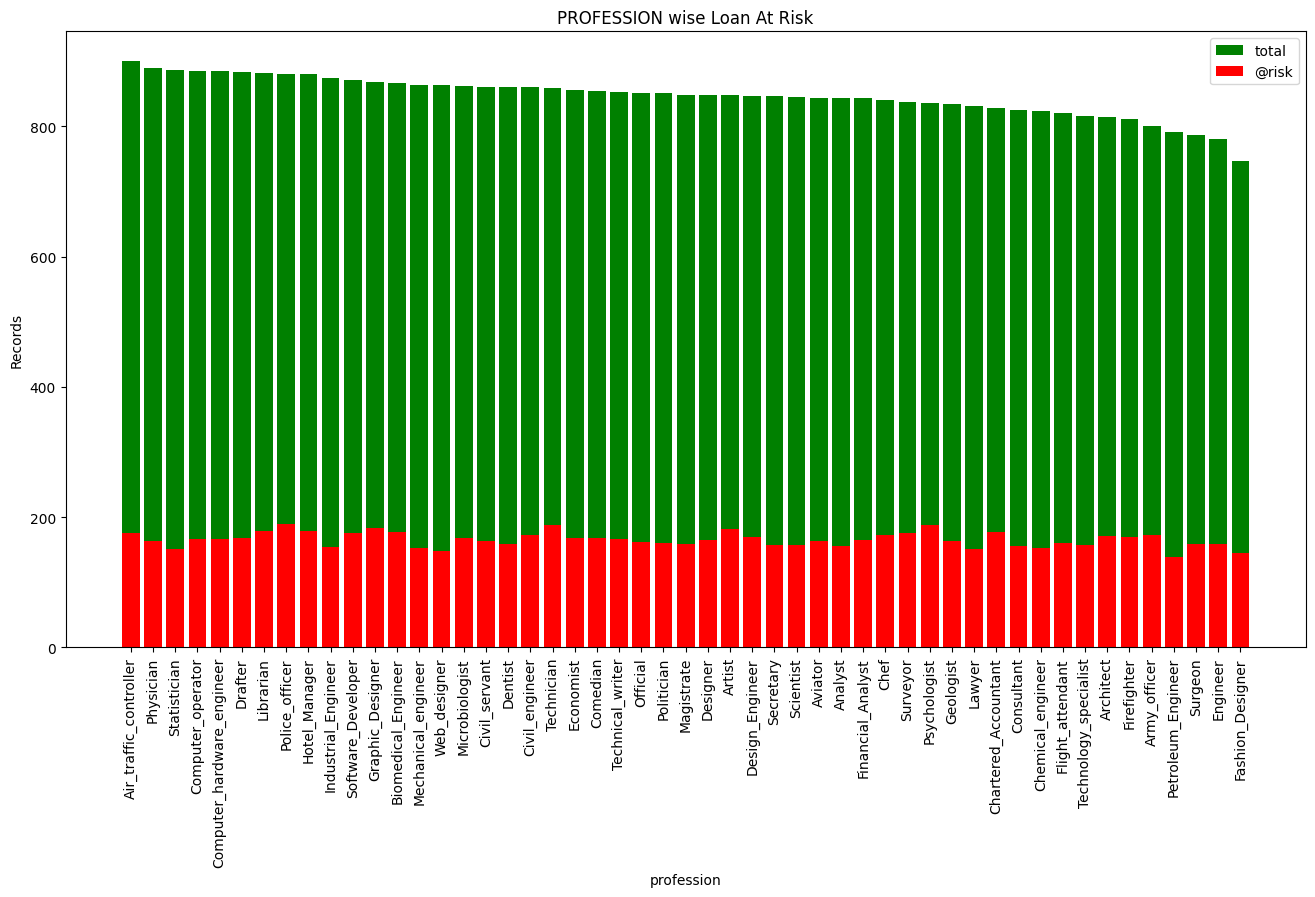

Top 5 with LeasT Default Rate: PROFESSION
             profession  risk_flag  total_records  Average_@risk
44         Statistician        151            886       0.170429
50         Web_designer        148            863       0.171495
36   Petroleum_Engineer        138            791       0.174463
29  Industrial_Engineer        154            875       0.176000
33  Mechanical_engineer        153            863       0.177289
Top 5 with Most Default Rate: PROFESSION
              profession  risk_flag  total_records  Average_@risk
7   Chartered_Accountant        177            828       0.213768
38        Police_officer        189            881       0.214529
3           Army_officer        172            801       0.214732
48            Technician        188            859       0.218859
40          Psychologist        188            836       0.224880


In [342]:
univariate_barplot(data_orig, 'profession', 'risk_flag')


### Observations
#### -The Profession, one of the most important feature in risk identification, There are more than 51 unique  proefession were Air traffic controller, physician and statistician has most records over 850 approx. in our dataset.
#### -Customers like, Who serving for the nation like Police officers and Army officer has higher default rate



## Year OF Experience

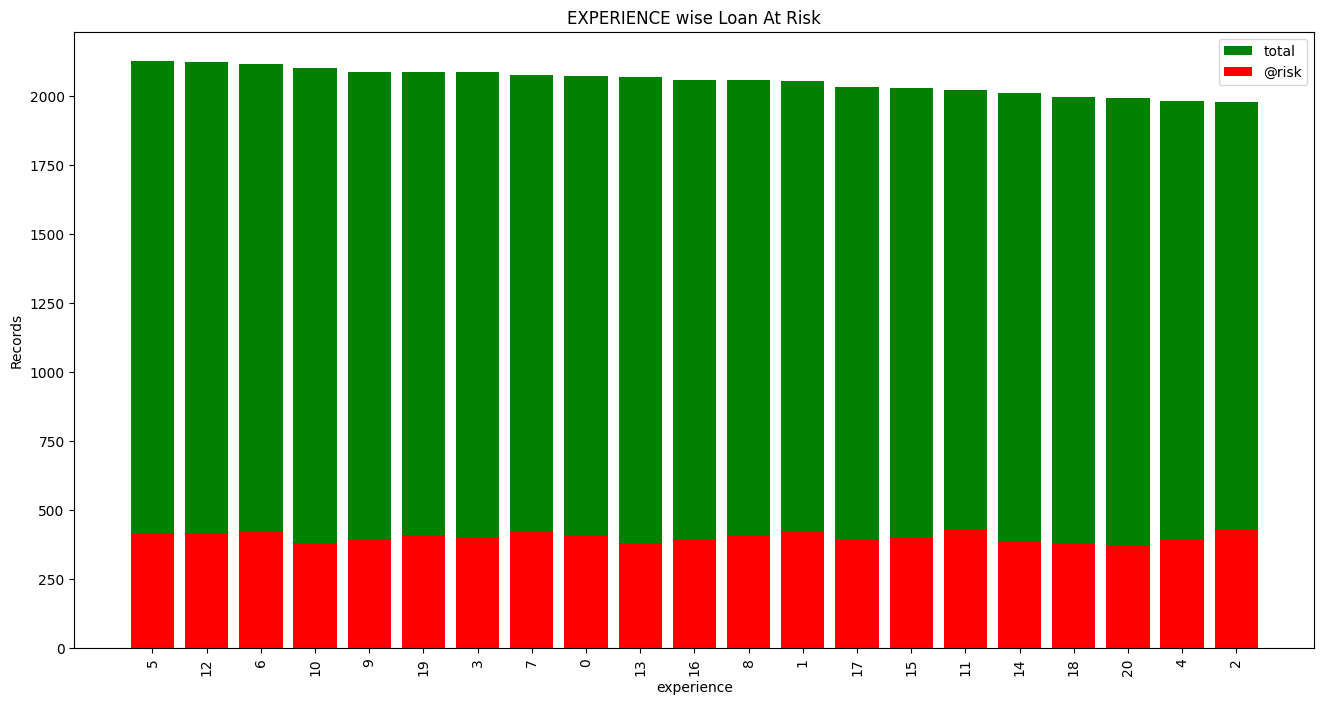

Top 5 with LeasT Default Rate: EXPERIENCE
    experience  risk_flag  total_records  Average_@risk
10          10        380           2103       0.180694
13          13        380           2069       0.183664
20          20        372           1994       0.186560
18          18        376           1999       0.188094
16          16        390           2061       0.189229
Top 5 with Most Default Rate: EXPERIENCE
    experience  risk_flag  total_records  Average_@risk
6            6        423           2119       0.199622
7            7        424           2076       0.204239
1            1        424           2054       0.206426
11          11        430           2023       0.212556
2            2        431           1980       0.217677


In [343]:
univariate_barplot(data_orig, query_col='experience',targate_col='risk_flag')


### Observations
#### -The Customer Experiance ranges (0 - 20) Years with Average Experiance of 10.08 Years.
#### -We can clearly see The customers with double digit experiance has least default rate expect some cases like 11
#### -Customer like 0 to 2 has higher default rate
#### -This indicate customers with very less experiance in their profession are at higher risk of default.

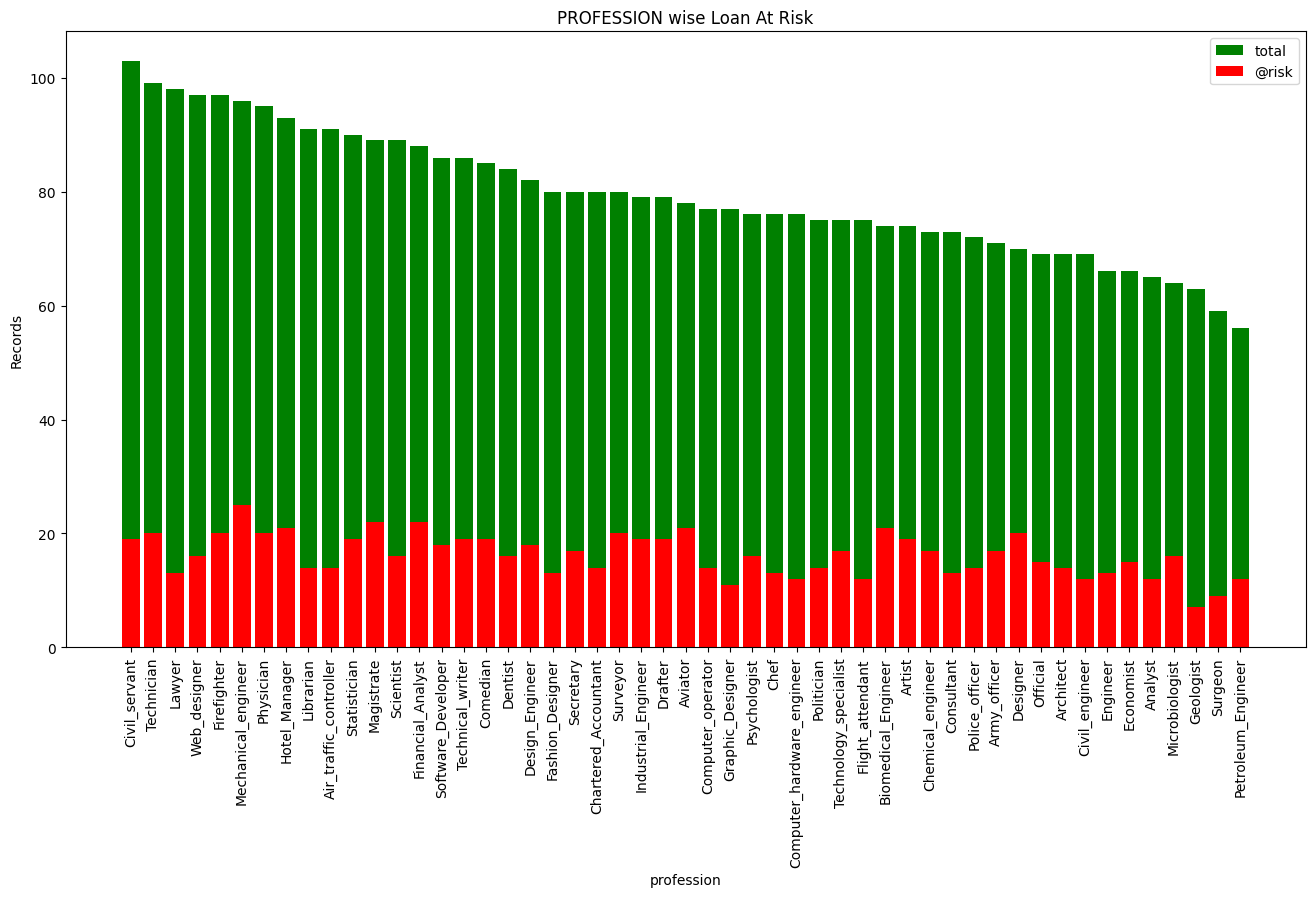

Top 5 with LeasT Default Rate: PROFESSION
          profession  risk_flag  total_records  Average_@risk
26         Geologist          7             63       0.111111
30            Lawyer         13             98       0.132653
27  Graphic_Designer         11             77       0.142857
45           Surgeon          9             59       0.152542
31         Librarian         14             91       0.153846
Top 5 with Most Default Rate: PROFESSION
             profession  risk_flag  total_records  Average_@risk
4                Artist         19             74       0.256757
33  Mechanical_engineer         25             96       0.260417
5               Aviator         21             78       0.269231
6   Biomedical_Engineer         21             74       0.283784
18             Designer         20             70       0.285714
records : (4055, 13)


In [344]:
# lets see the professions of 11 years experiance and 15 years experiance
profession_11_and_15 = data_orig[(data_orig['experience']==11) | (data_orig['experience']==15)]
univariate_barplot(data=profession_11_and_15, query_col='profession', targate_col='risk_flag')
print('records :',profession_11_and_15.shape)

### Observations
#### -The professions like Designer Biomedical_Engineer and Aviator has over 28% Average Combined default rate.
#### -Still didn't get why this category customers has high default rate as these professions has quite good wealth.

## Income

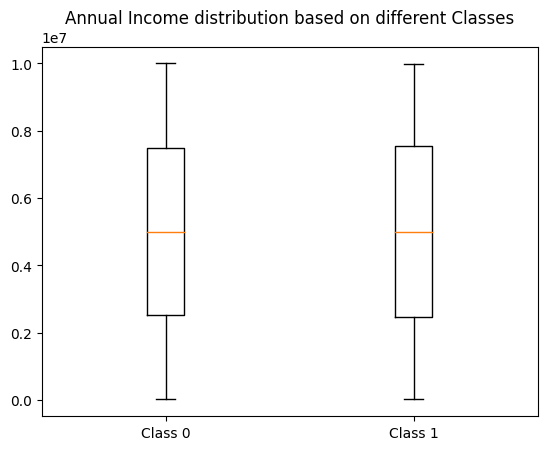

In [345]:
# income --- box plot
risk_flag_income = data_orig[data_orig['risk_flag'] == 1]['income']
not_risk_flag_income = data_orig[data_orig['risk_flag']==0]['income']
plt.boxplot([not_risk_flag_income,risk_flag_income])
plt.title('Annual Income distribution based on different Classes')
plt.xticks([1,2],('Class 0','Class 1'))
plt.show()

In [346]:
print('Mean Annual Income for Class 0: ', round(data_orig[data_orig['risk_flag'] == 0]['income'].mean()))
print('Mean Annual Income for Class 1: ', round(data_orig[data_orig['risk_flag'] == 1]['income'].mean()))

Mean Annual Income for Class 0:  4998435
Mean Annual Income for Class 1:  5002267


### Observations
#### -The Box plot highly similar for both classes with no outliers.

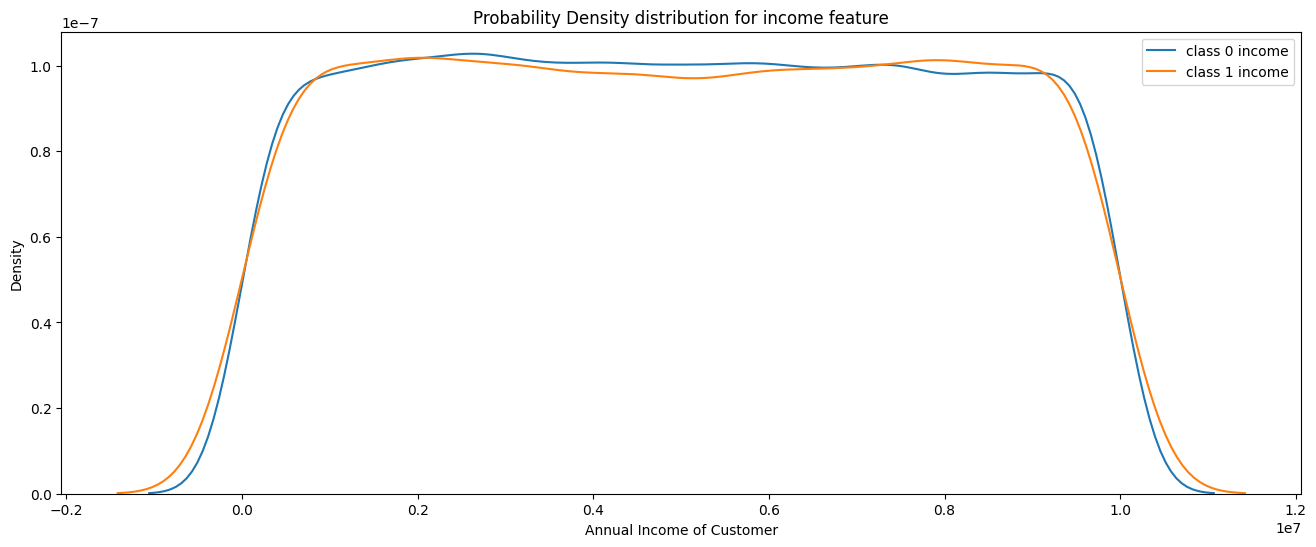

In [347]:
plt.figure(figsize=(16,6))
sns.distplot(not_risk_flag_income,hist=False, label='class 0 income')
sns.distplot(risk_flag_income,hist=False, label='class 1 income')
plt.legend()
plt.title('Probability Density distribution for income feature')
plt.xlabel('Annual Income of Customer')
plt.show()

### Observations
#### -There is high overlap between the classes based on the customers income
#### -This indicates only income feature not enough to differentiat the loan default.

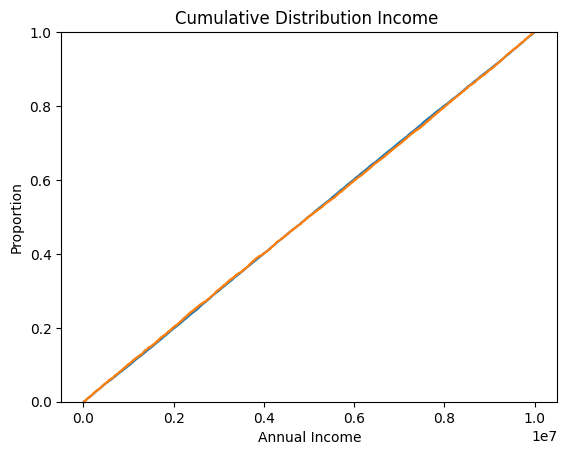

In [348]:
sns.ecdfplot(not_risk_flag_income)
sns.ecdfplot(risk_flag_income)
plt.title('Cumulative Distribution Income ')
plt.xlabel('Annual Income')
plt.show()

### Observations
#### -CDF plot also carry similar information not showning any differentiator between these two classes based on Income.

## Current Job Years

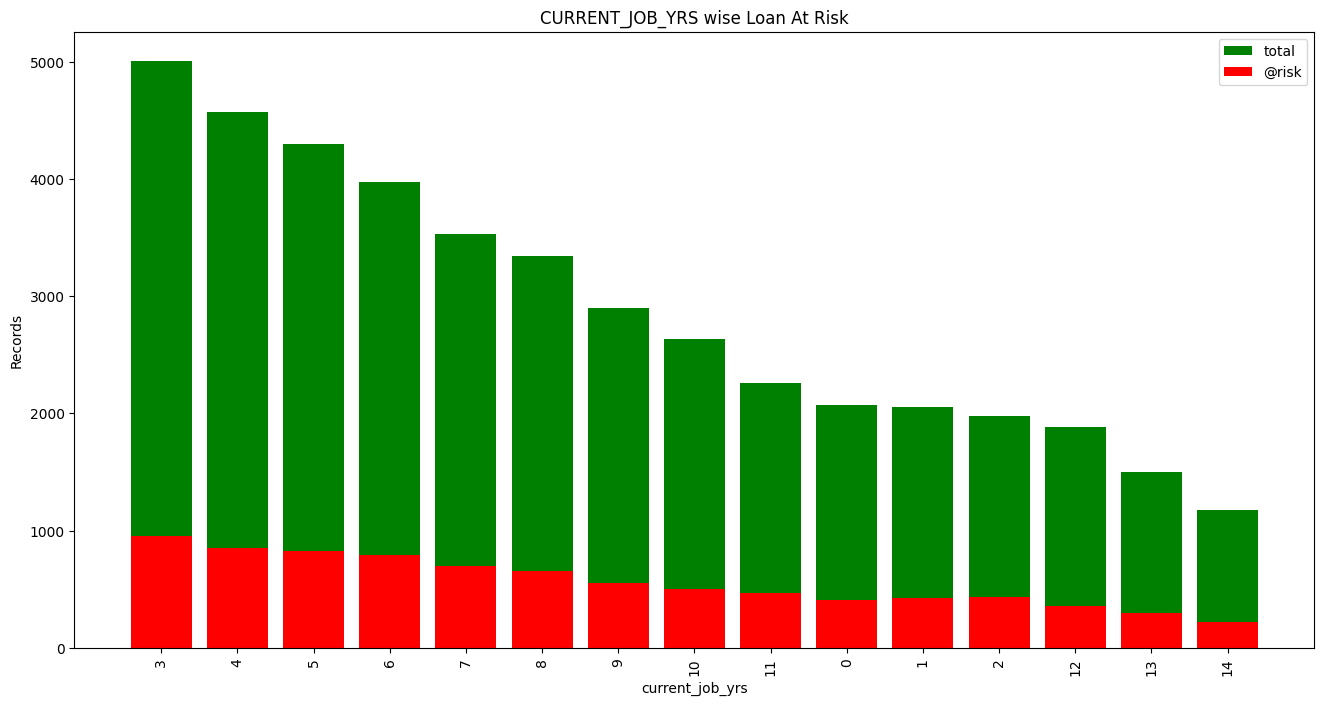

Top 5 with LeasT Default Rate: CURRENT_JOB_YRS
    current_job_yrs  risk_flag  total_records  Average_@risk
4                 4        854           4571       0.186830
14               14        222           1176       0.188776
10               10        499           2637       0.189230
12               12        357           1883       0.189591
9                 9        551           2904       0.189738
Top 5 with Most Default Rate: CURRENT_JOB_YRS
    current_job_yrs  risk_flag  total_records  Average_@risk
7                 7        702           3535       0.198586
6                 6        794           3973       0.199849
11               11        465           2262       0.205570
1                 1        424           2054       0.206426
2                 2        431           1980       0.217677


In [349]:
univariate_barplot(query_col='current_job_yrs',targate_col='risk_flag', data=data_orig)


### Observations
#### -This feature is highly similar to the Experiance.
#### -Again customers with job years between 0 to 2 have higher default rate
#### -The Current Job years range between 0 to 14.


<Figure size 1000x600 with 0 Axes>

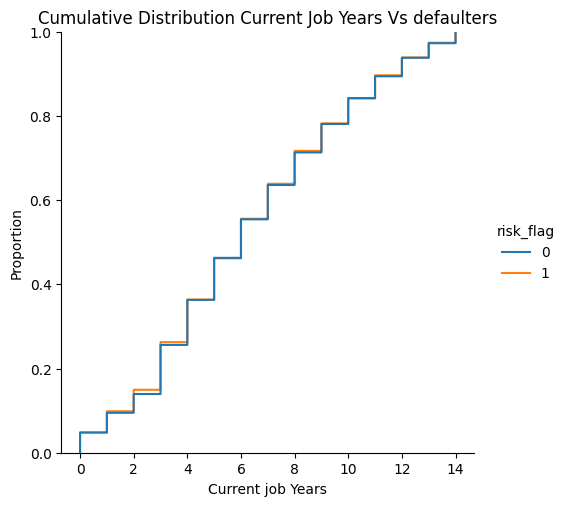

In [350]:
plt.figure(figsize=(10,6))
sns.displot(x='current_job_yrs', hue='risk_flag', data=data_orig, kind='ecdf')
plt.title('Cumulative Distribution Current Job Years Vs defaulters')
plt.xlabel('Current job Years')
plt.show()

## Current House Years

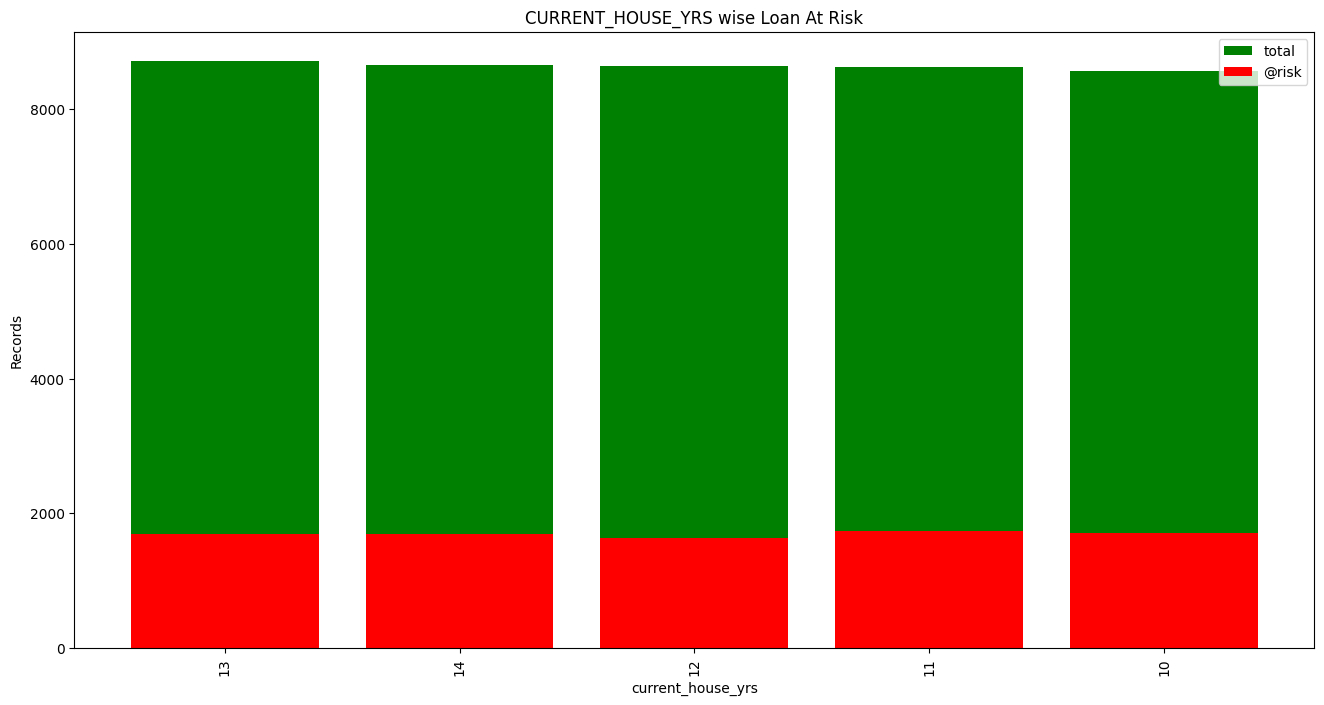

Top 5 with LeasT Default Rate: CURRENT_HOUSE_YRS
   current_house_yrs  risk_flag  total_records  Average_@risk
2                 12       1628           8640       0.188426
3                 13       1687           8713       0.193619
4                 14       1694           8652       0.195793
0                 10       1704           8561       0.199042
1                 11       1730           8624       0.200603
Top 5 with Most Default Rate: CURRENT_HOUSE_YRS
   current_house_yrs  risk_flag  total_records  Average_@risk
2                 12       1628           8640       0.188426
3                 13       1687           8713       0.193619
4                 14       1694           8652       0.195793
0                 10       1704           8561       0.199042
1                 11       1730           8624       0.200603


In [351]:
univariate_barplot(query_col='current_house_yrs',targate_col='risk_flag', data=data_orig, top=5)


### Observations
#### -We only 5 unique values for number of years living in the house from 10 to 14.
#### -The distributions of records and default rate is approximatly similar
